# Construct surface elevation anomalies time series

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray as rxr
import numpy as np
import datetime
from tqdm.auto import tqdm
import xesmf as xe
from matplotlib.patches import Rectangle
import pandas as pd
import geopandas as gpd
from shapely import wkt
import seaborn as sns

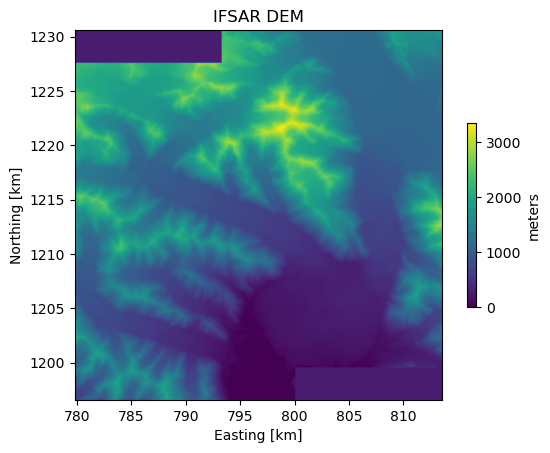

In [2]:
# -----Define path to data
data_path = '/Users/raineyaberle/Research/PhD/Hubbard/'
figures_out_path = os.path.join(data_path, 'figures')

# -----Define output path
h_out_path = os.path.join(data_path, 'surface_elevation', 'surface_elevation_filtered')

# -----Load coregistered surface elevation and ICESat-2 file names
h_fns = sorted(glob.glob(os.path.join(data_path, 'surface_elevation', 'coregistered', '*.tif')))
is2_fns = sorted(glob.glob(os.path.join(data_path, 'surface_elevation', 'ICESat-2', 'rasters', '*.tif')))

# -----Load IFSAR DEM
ifsar_fn = 'ifsar_hubbardDEM.tif'
ifsar = xr.open_dataset(os.path.join(data_path, 'surface_elevation', ifsar_fn))
# adjust dimensions
h = ifsar.band_data.data[0]
ifsar = ifsar.drop_dims('band')
ifsar['h'] = (('y', 'x'), h)
# Downsample to 20 m resolution
ifsar = ifsar.coarsen(x=4, y=4, boundary='pad').mean()

# -----Plot IFSAR DEM
plt.imshow(ifsar['h'], cmap='viridis',
           extent=(np.min(ifsar.x.data)/1e3, np.max(ifsar.x.data)/1e3, 
                   np.min(ifsar.y.data)/1e3, np.max(ifsar.y.data)/1e3))
plt.xlabel('Easting [km]')
plt.ylabel('Northing [km]')
plt.title('IFSAR DEM')
plt.colorbar(shrink=0.5, label='meters')
plt.show()

In [3]:
# Create a list of DEMs to filter out
filter_deets = [['2011-07-06', 'ArcticDEM'],
                ['2011-07-11', 'ArcticDEM'],
                ['2015-08-29', 'ArcticDEM'],
                ['2016-09-17', 'ArcticDEM'],
                ['2017-01-29', 'ArcticDEM'],
                ['2019-05-03', 'ArcticDEM'],
                ['2020-05-30', 'ArcticDEM'],
                ['2020-11-18', 'ArcticDEM'],
                ['2021-02-08', 'ArcticDEM']]

In [4]:
['2011-07-06', 'ArcticDEM'] in filter_deets

True

  0%|          | 0/142 [00:00<?, ?it/s]

2012-05-24 00:00:00 OIB
Surface elevations loaded from file.


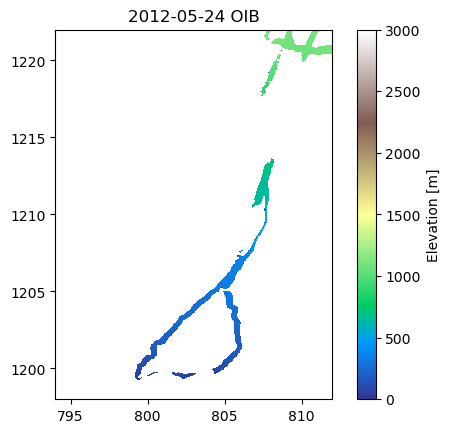

 
2013-05-21 00:00:00 OIB
Surface elevations loaded from file.


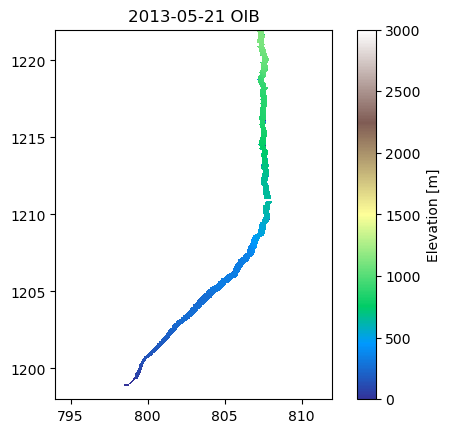

 
2012-03-21 00:00:00 OIB
Surface elevations loaded from file.


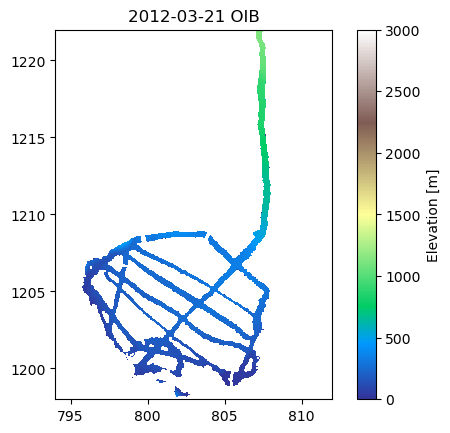

 
2014-05-17 00:00:00 OIB
Surface elevations loaded from file.


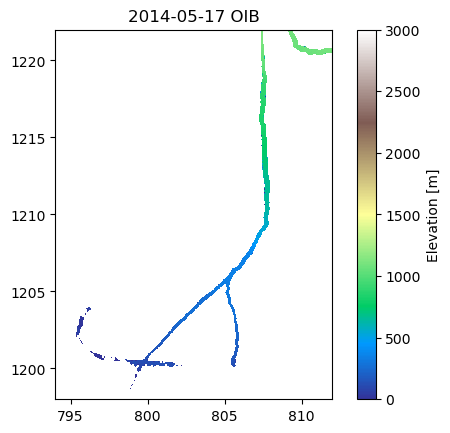

 
2015-05-19 00:00:00 OIB
Surface elevations loaded from file.


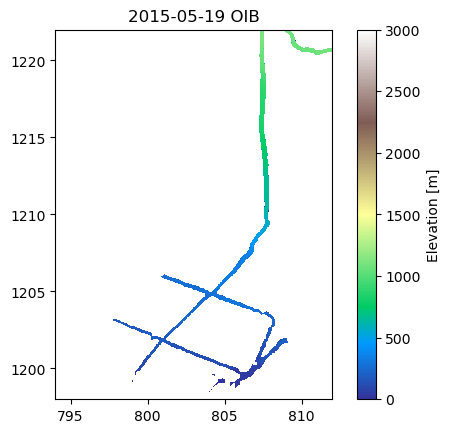

 
2016-05-15 00:00:00 OIB
Surface elevations loaded from file.


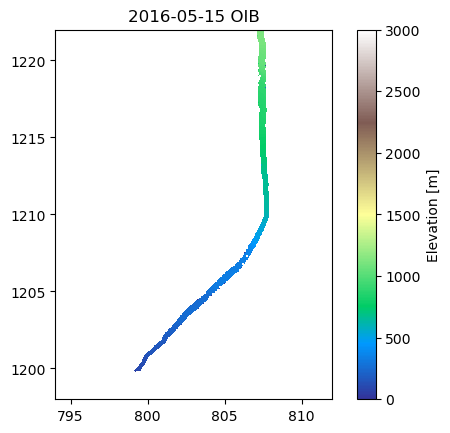

 
2018-05-23 00:00:00 OIB
Surface elevations loaded from file.


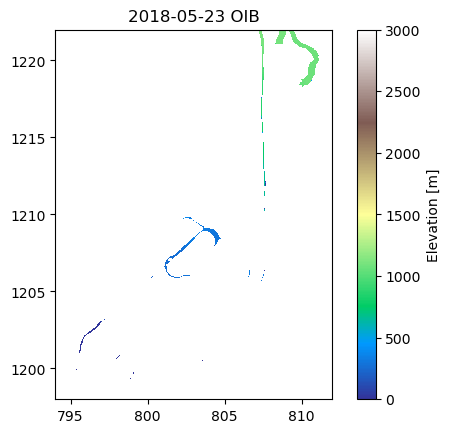

 
2019-09-28 00:00:00 OIB
Surface elevations loaded from file.


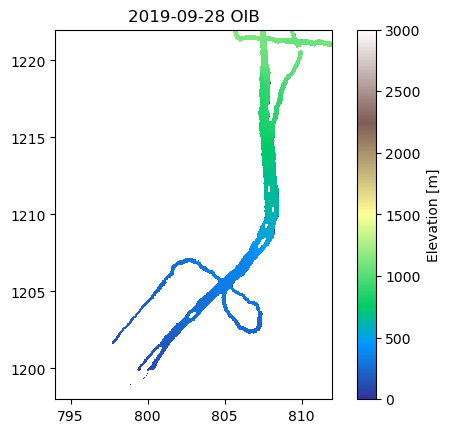

 
2020-06-05 00:00:00 OIB
Surface elevations loaded from file.


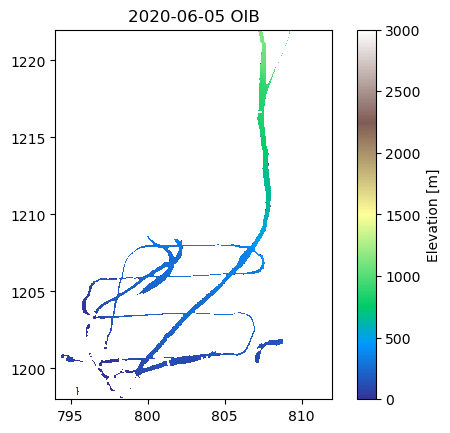

 
2009-02-22 00:00:00 ArcticDEM
Surface elevations loaded from file.


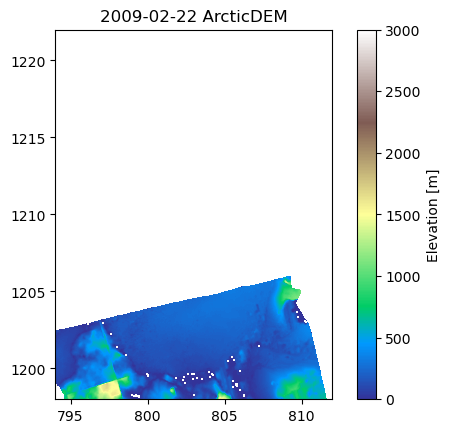

 
2009-02-22 00:00:00 ArcticDEM
Surface elevations loaded from file.


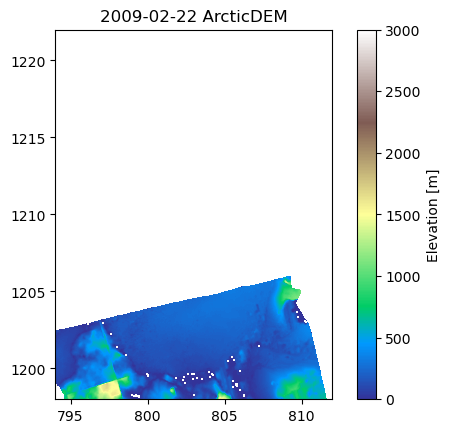

 
2010-08-26 00:00:00 ArcticDEM
Surface elevations loaded from file.


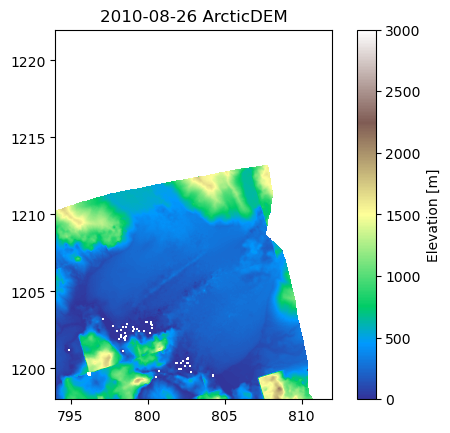

 
2011-07-06 00:00:00 ArcticDEM
DEM on the filter list, skipping...
2011-07-11 00:00:00 ArcticDEM
DEM on the filter list, skipping...
2011-09-25 00:00:00 ArcticDEM
Surface elevations loaded from file.


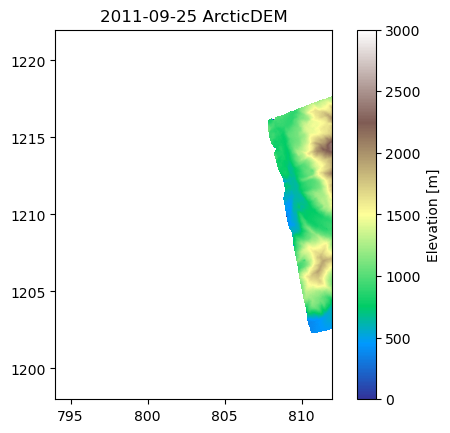

 
2011-10-04 00:00:00 ArcticDEM
Surface elevations loaded from file.


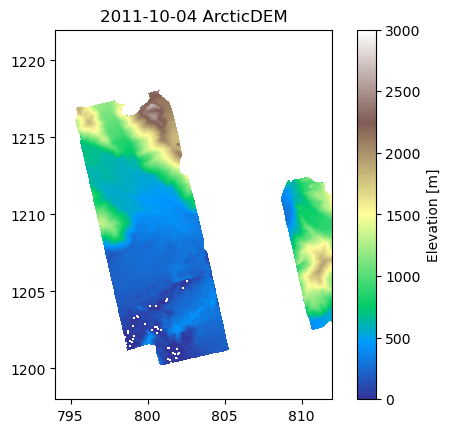

 
2018-09-04 00:00:00 ArcticDEM
Surface elevations loaded from file.


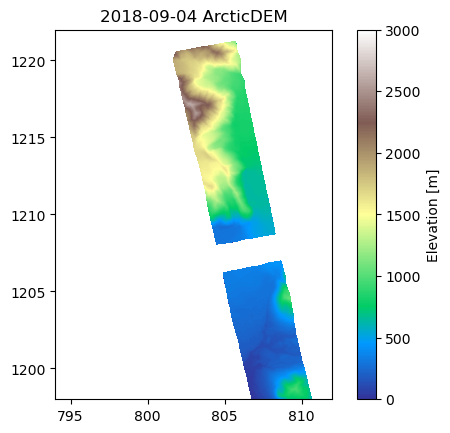

 
2021-03-05 00:00:00 ArcticDEM
Surface elevations loaded from file.


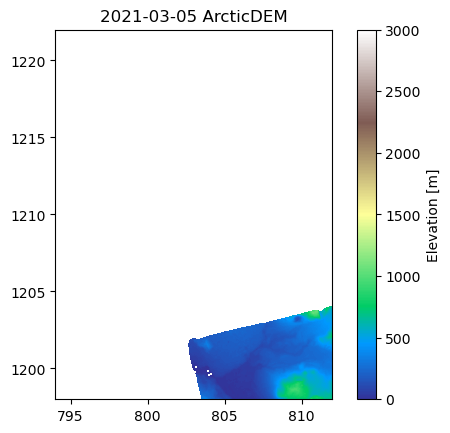

 
2013-05-22 00:00:00 ArcticDEM
Surface elevations loaded from file.


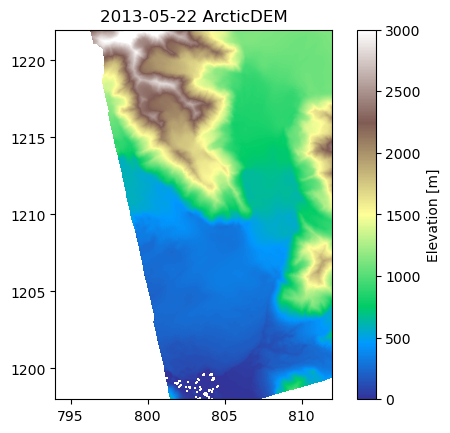

 
2013-06-25 00:00:00 ArcticDEM
Surface elevations loaded from file.


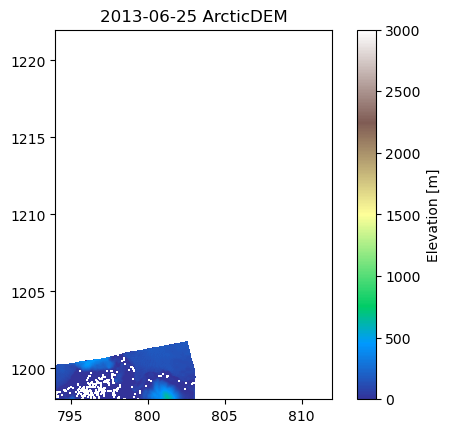

 
2013-08-10 00:00:00 ArcticDEM
Surface elevations loaded from file.


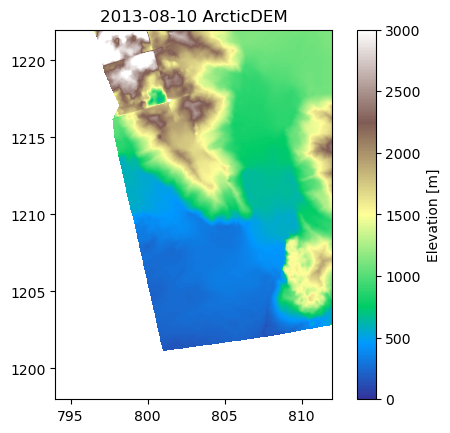

 
2013-12-07 00:00:00 ArcticDEM
Surface elevations loaded from file.


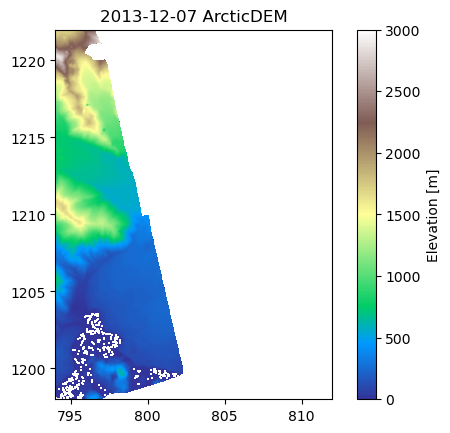

 
2014-04-23 00:00:00 ArcticDEM
Surface elevations loaded from file.


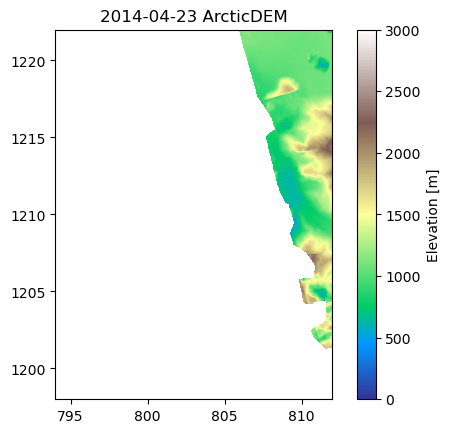

 
2014-11-11 00:00:00 ArcticDEM
Surface elevations loaded from file.


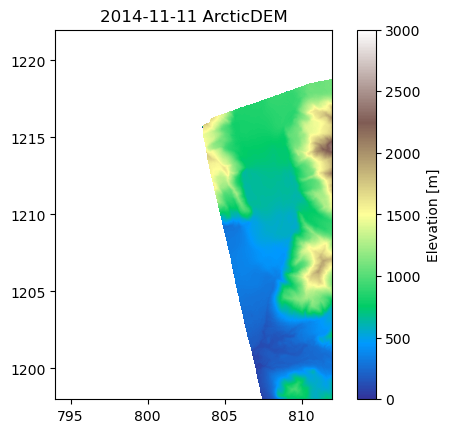

 
2014-11-20 00:00:00 ArcticDEM
Surface elevations loaded from file.


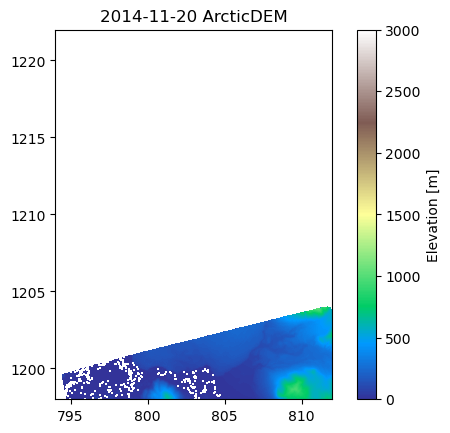

 
2015-10-31 00:00:00 ArcticDEM
Surface elevations loaded from file.


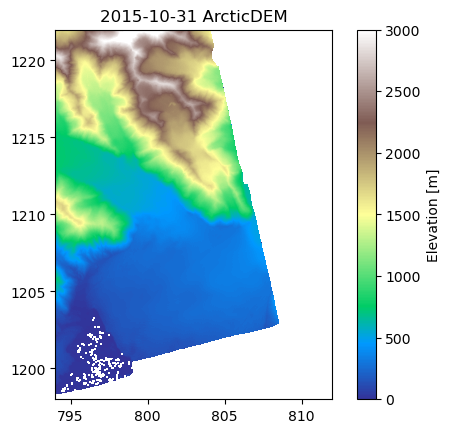

 
2016-03-22 00:00:00 ArcticDEM
Surface elevations loaded from file.


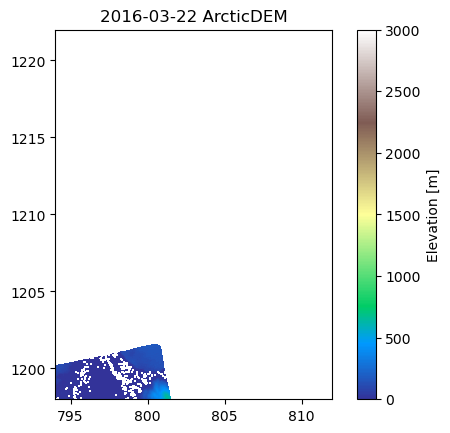

 
2016-11-21 00:00:00 ArcticDEM
Surface elevations loaded from file.


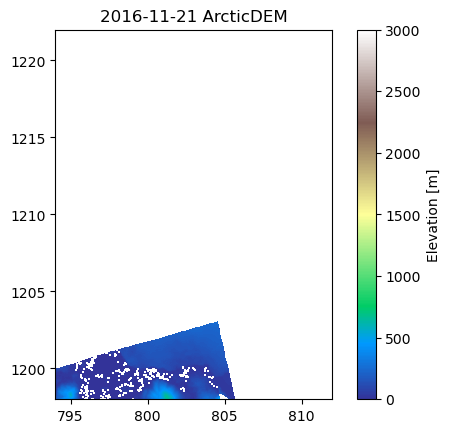

 
2017-01-29 00:00:00 ArcticDEM
DEM on the filter list, skipping...
2017-05-10 00:00:00 ArcticDEM
Surface elevations loaded from file.


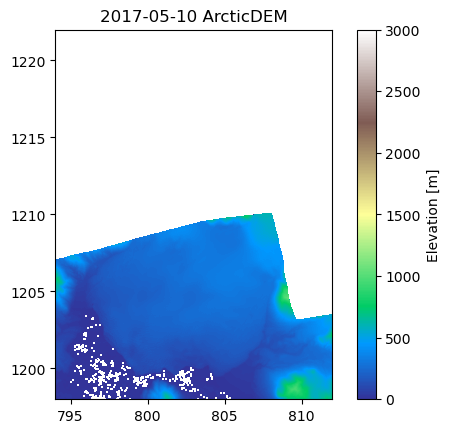

 
2018-01-30 00:00:00 ArcticDEM
Surface elevations loaded from file.


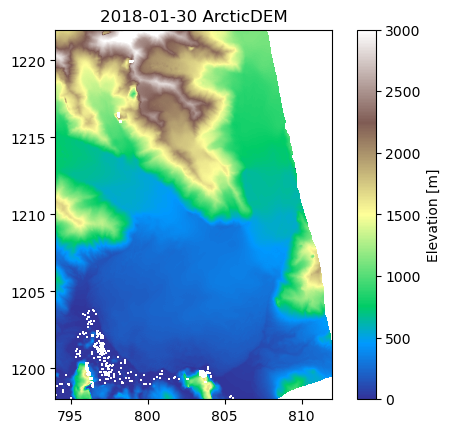

 
2018-05-07 00:00:00 ArcticDEM
Surface elevations loaded from file.


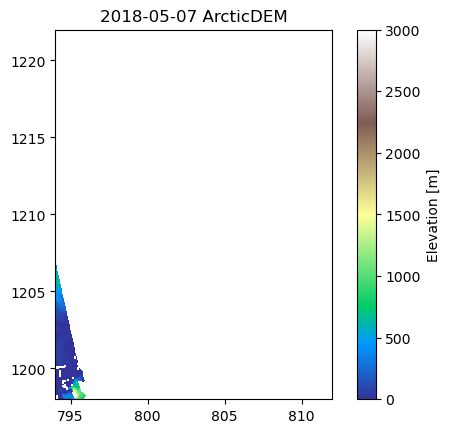

 
2019-01-05 00:00:00 ArcticDEM
Surface elevations loaded from file.


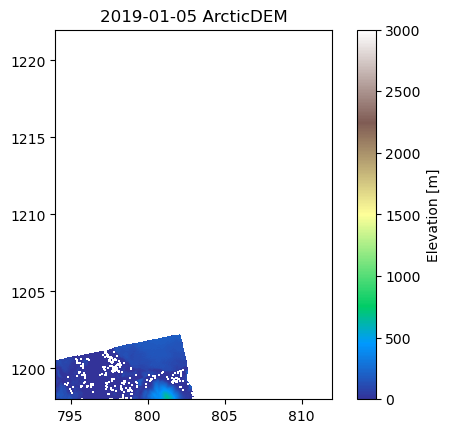

 
2019-06-20 00:00:00 ArcticDEM
Surface elevations loaded from file.


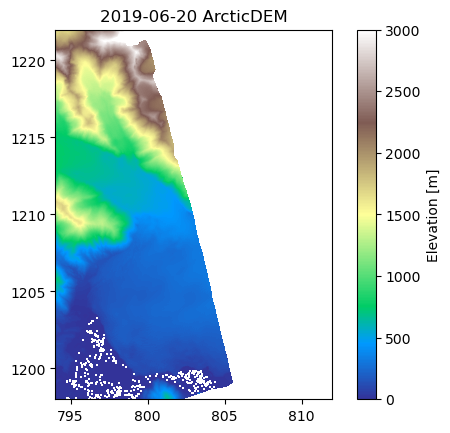

 
2020-05-27 00:00:00 ArcticDEM
Surface elevations loaded from file.


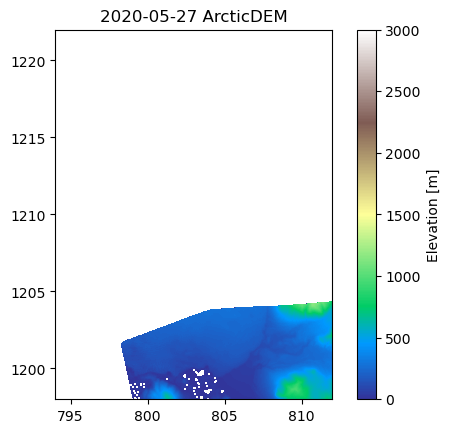

 
2020-05-30 00:00:00 ArcticDEM
DEM on the filter list, skipping...
2020-06-04 00:00:00 ArcticDEM
Surface elevations loaded from file.


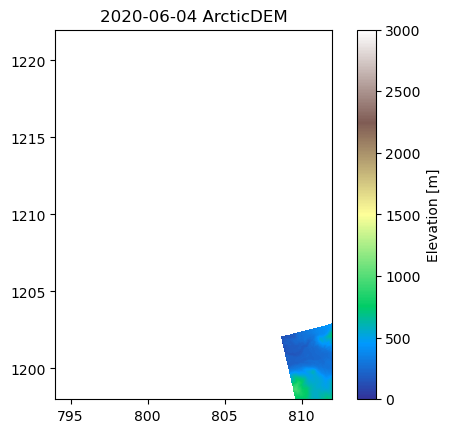

 
2020-09-05 00:00:00 ArcticDEM
Surface elevations loaded from file.


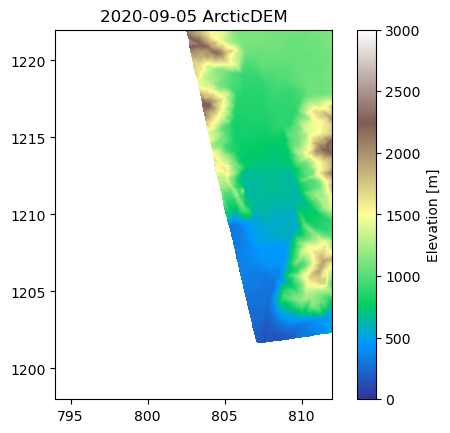

 
2021-02-23 00:00:00 ArcticDEM
Surface elevations loaded from file.


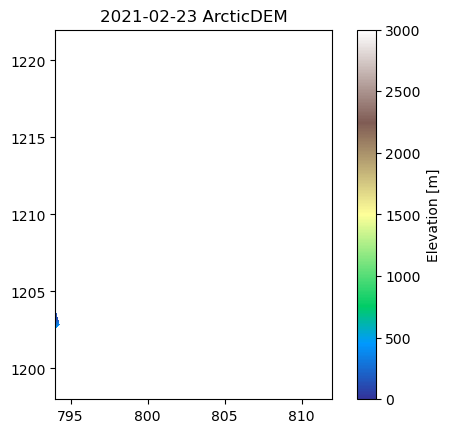

 
2022-04-29 00:00:00 ArcticDEM
Surface elevations loaded from file.


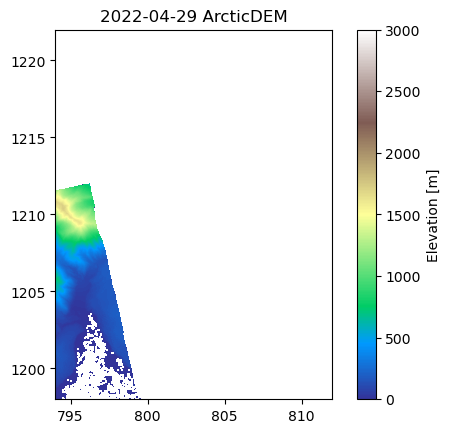

 
2013-06-16 00:00:00 ArcticDEM
Surface elevations loaded from file.


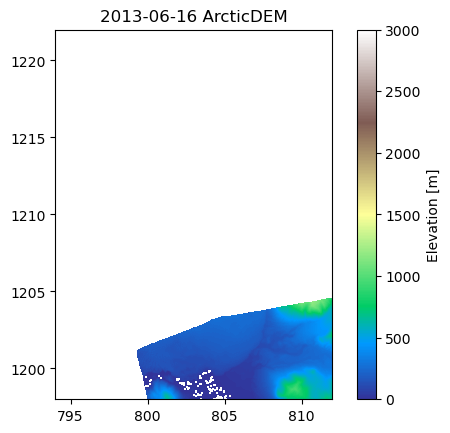

 
2014-03-07 00:00:00 ArcticDEM
Surface elevations loaded from file.


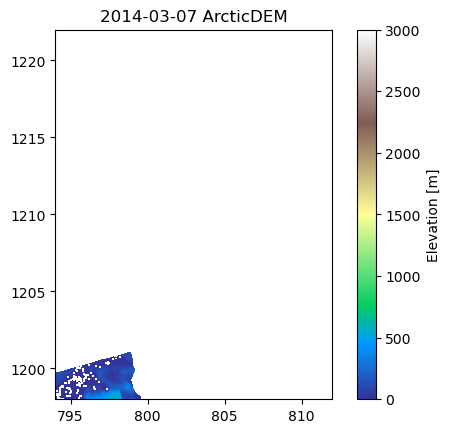

 
2014-11-14 00:00:00 ArcticDEM
Surface elevations loaded from file.


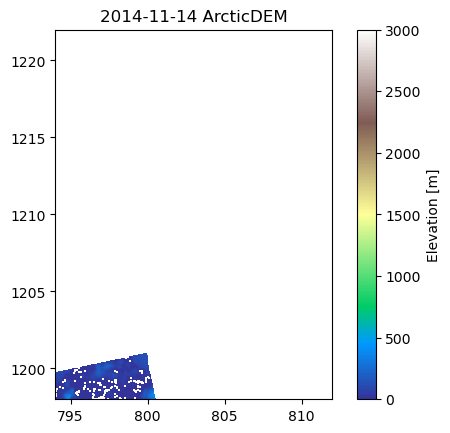

 
2015-08-29 00:00:00 ArcticDEM
DEM on the filter list, skipping...
2016-05-10 00:00:00 ArcticDEM
Surface elevations loaded from file.


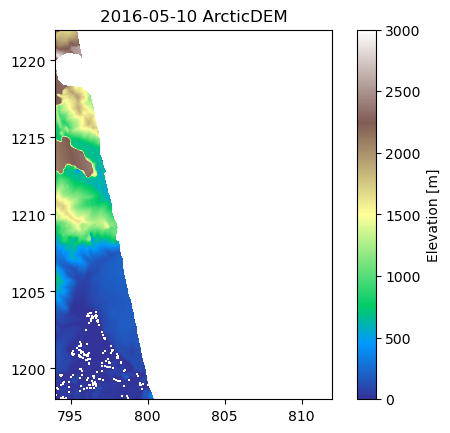

 
2016-07-17 00:00:00 ArcticDEM
Surface elevations loaded from file.


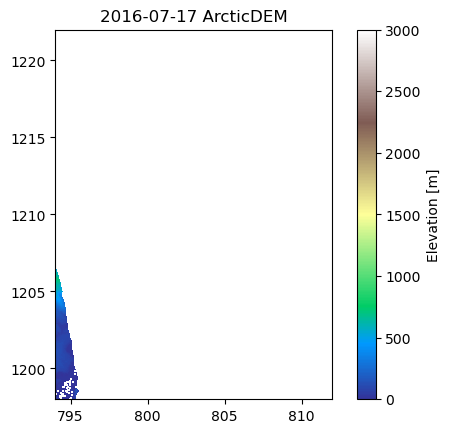

 
2016-09-17 00:00:00 ArcticDEM
DEM on the filter list, skipping...
2016-12-31 00:00:00 ArcticDEM
Surface elevations loaded from file.


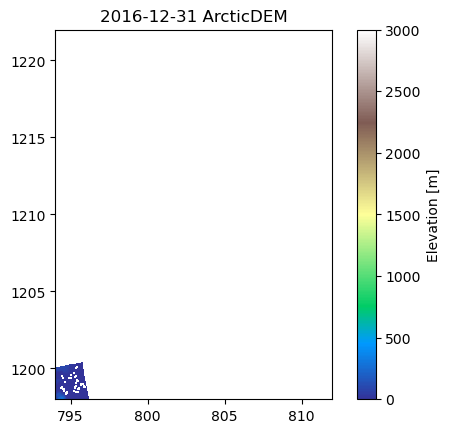

 
2017-01-17 00:00:00 ArcticDEM
Surface elevations loaded from file.


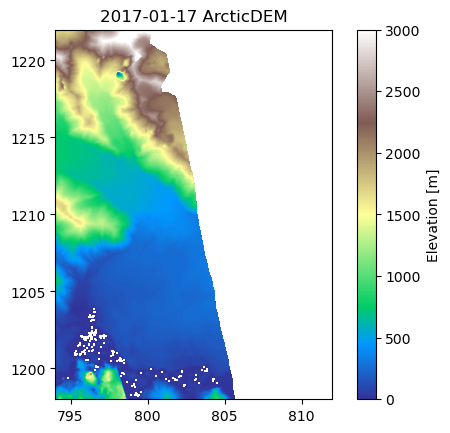

 
2018-01-17 00:00:00 ArcticDEM
Surface elevations loaded from file.


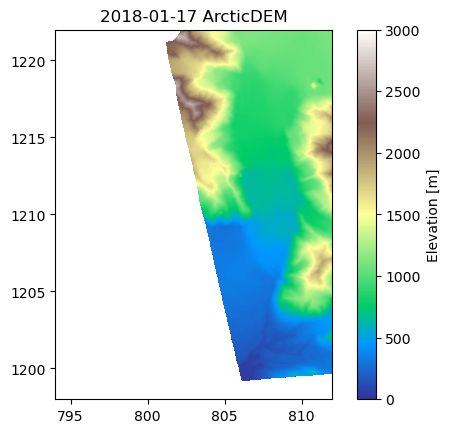

 
2018-01-28 00:00:00 ArcticDEM
Surface elevations loaded from file.


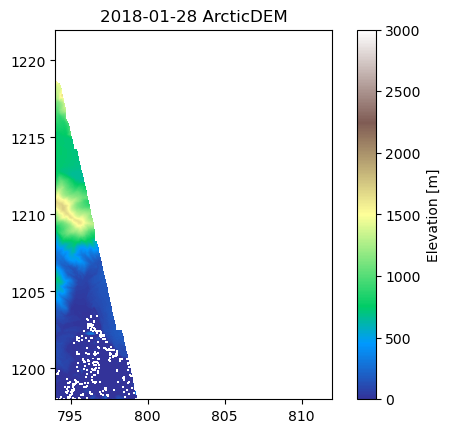

 
2018-11-23 00:00:00 ArcticDEM
Surface elevations loaded from file.


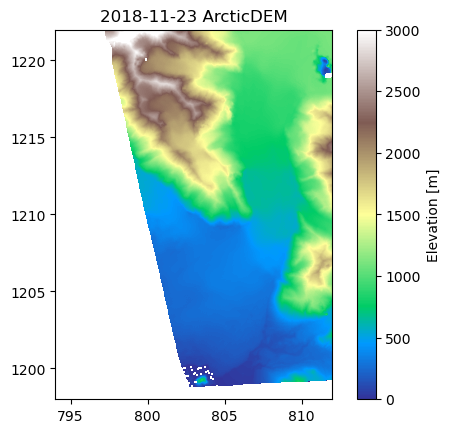

 
2019-01-17 00:00:00 ArcticDEM
Surface elevations loaded from file.


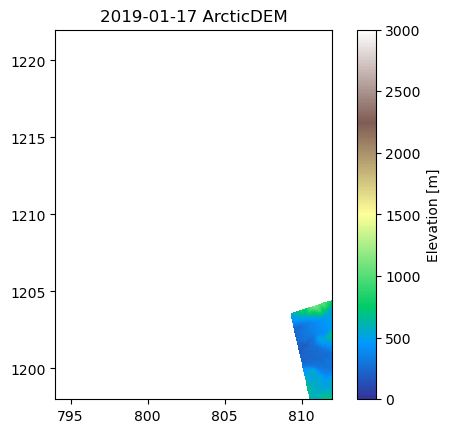

 
2019-05-03 00:00:00 ArcticDEM
DEM on the filter list, skipping...
2019-09-05 00:00:00 ArcticDEM
Surface elevations loaded from file.


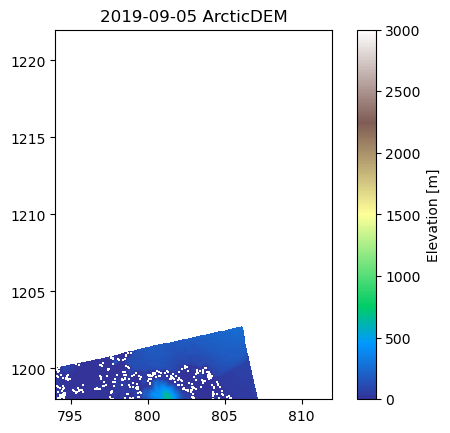

 
2020-11-18 00:00:00 ArcticDEM
DEM on the filter list, skipping...
2021-02-15 00:00:00 ArcticDEM
Surface elevations loaded from file.


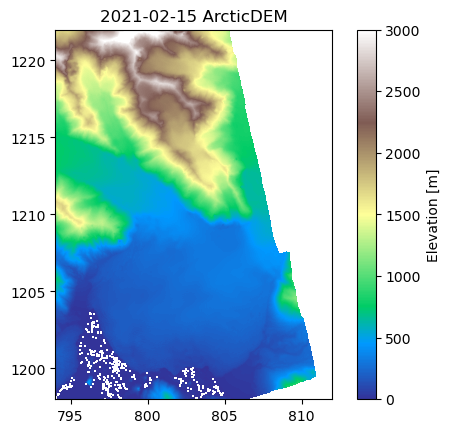

 
2022-06-03 00:00:00 ArcticDEM
Surface elevations loaded from file.


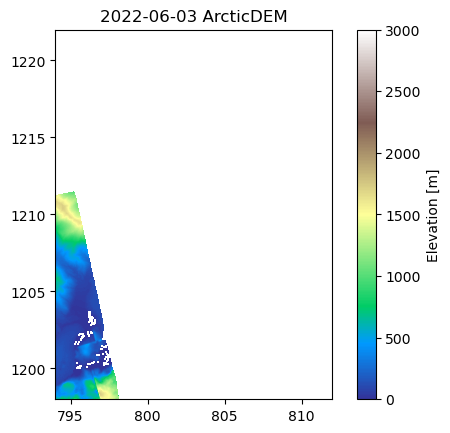

 
2018-10-11 00:00:00 ArcticDEM
Surface elevations loaded from file.


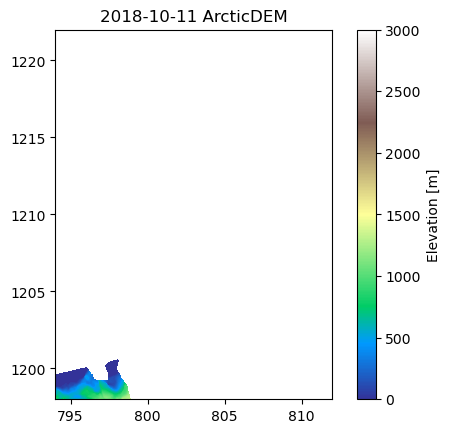

 
2018-11-30 00:00:00 ArcticDEM
Surface elevations loaded from file.


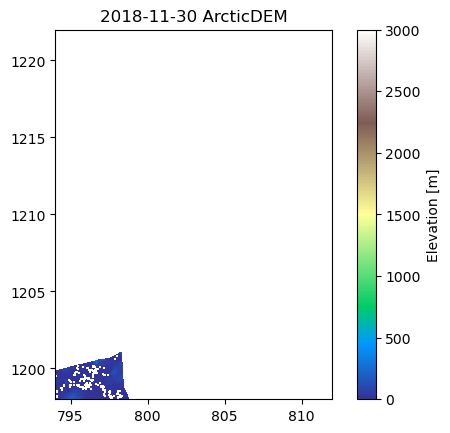

 
2020-05-04 00:00:00 ArcticDEM
Surface elevations loaded from file.


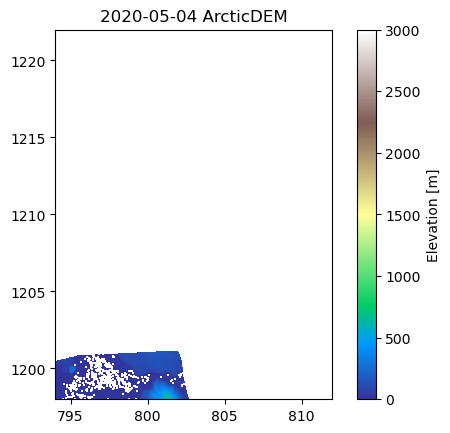

 
2021-02-08 00:00:00 ArcticDEM
DEM on the filter list, skipping...
2021-07-17 00:00:00 ArcticDEM
Surface elevations loaded from file.


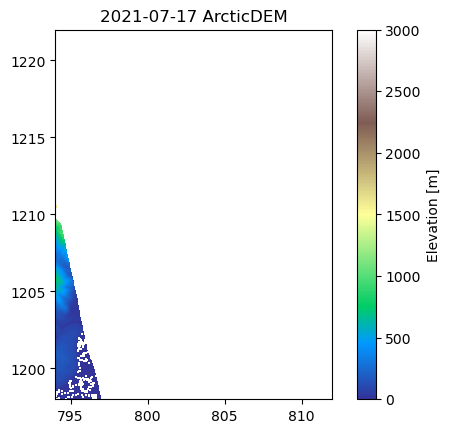

 
2021-08-29 00:00:00 ArcticDEM
Surface elevations loaded from file.


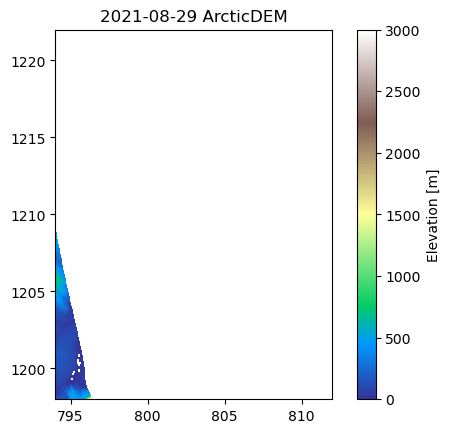

 
2021-10-25 00:00:00 ArcticDEM
Surface elevations loaded from file.


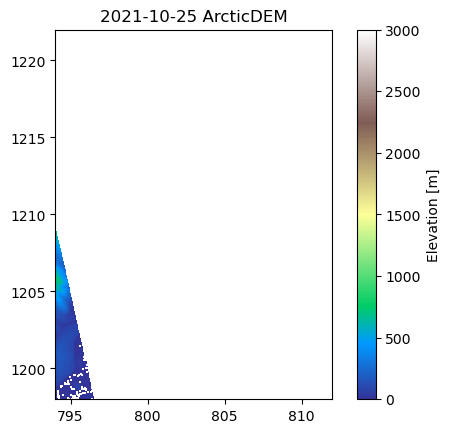

 
2022-02-23 00:00:00 ArcticDEM
Surface elevations loaded from file.


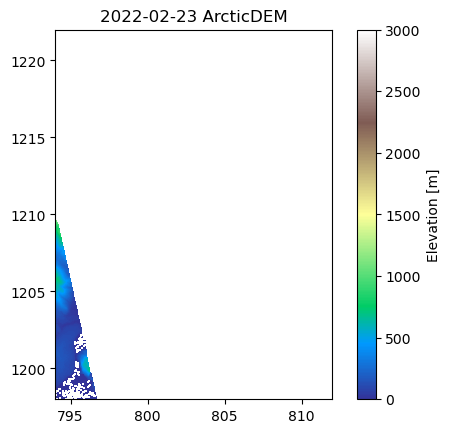

 
2022-03-26 00:00:00 ArcticDEM
Surface elevations loaded from file.


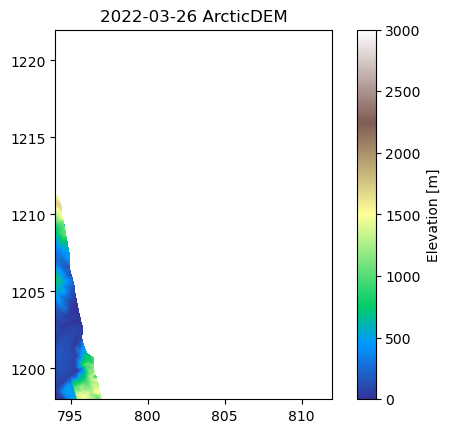

 
2022-04-14 00:00:00 ArcticDEM
Surface elevations loaded from file.


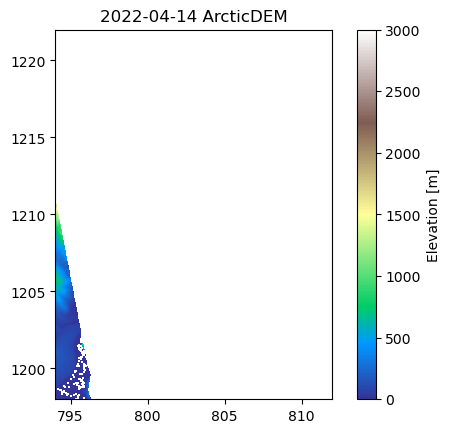

 
2022-04-16 00:00:00 ArcticDEM
Surface elevations loaded from file.


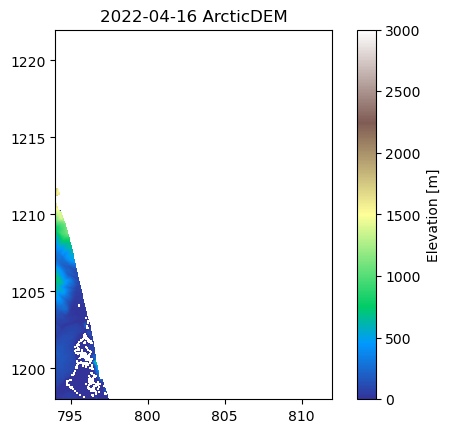

 
2022-04-21 00:00:00 ArcticDEM
Surface elevations loaded from file.


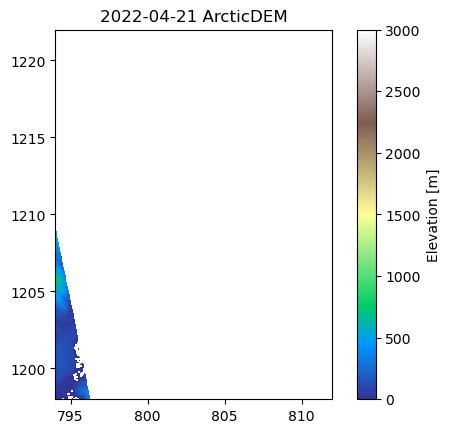

 
2022-05-05 00:00:00 ArcticDEM
Surface elevations loaded from file.


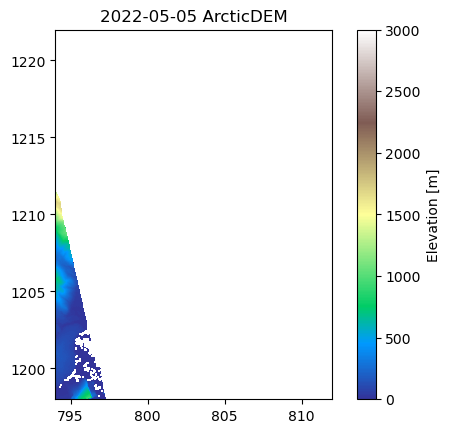

 
2022-05-22 00:00:00 ArcticDEM
Surface elevations loaded from file.


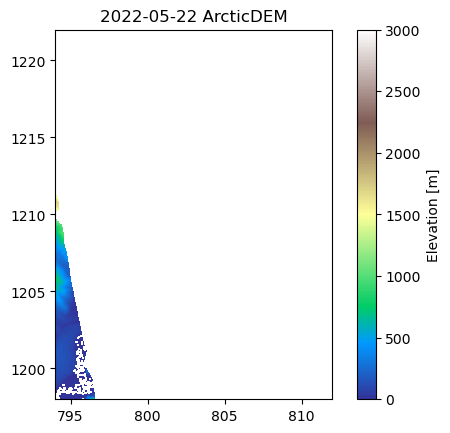

 
2022-05-29 00:00:00 ArcticDEM
Surface elevations loaded from file.


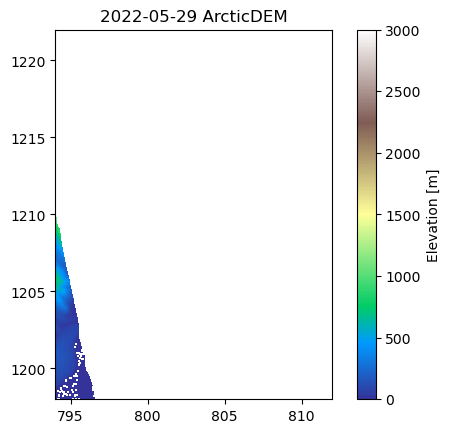

 
2022-06-17 00:00:00 ArcticDEM
Surface elevations loaded from file.


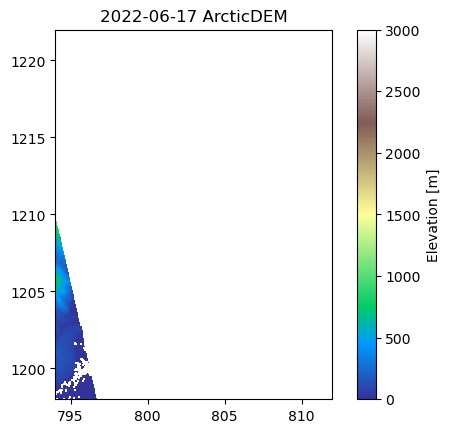

 
2022-06-29 00:00:00 ArcticDEM
Surface elevations loaded from file.


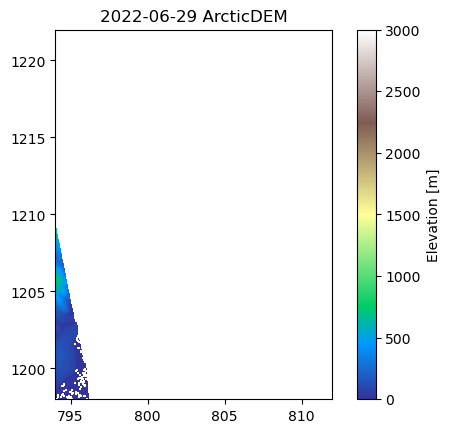

 
2022-07-04 00:00:00 ArcticDEM
Surface elevations loaded from file.


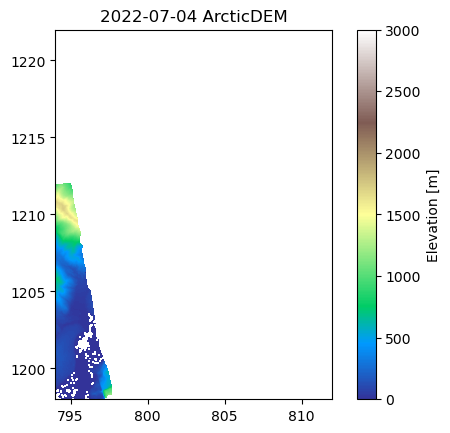

 
2022-08-11 00:00:00 ArcticDEM
Surface elevations loaded from file.


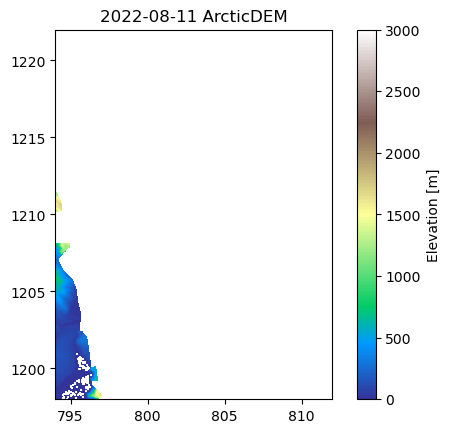

 
2022-09-11 00:00:00 ArcticDEM
Surface elevations loaded from file.


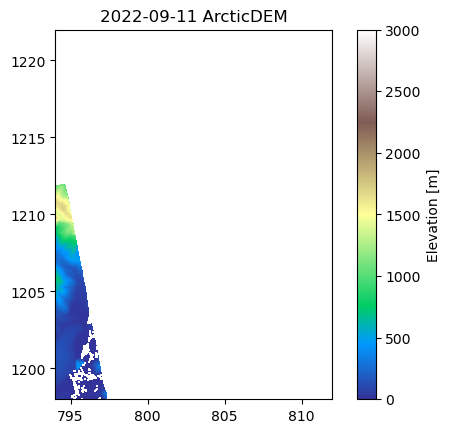

 
2022-12-17 00:00:00 ArcticDEM
Surface elevations loaded from file.


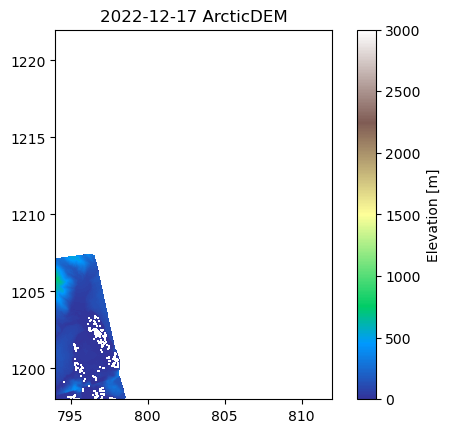

 
2018-11-06 00:00:00 ICESat-2
Surface elevations loaded from file.


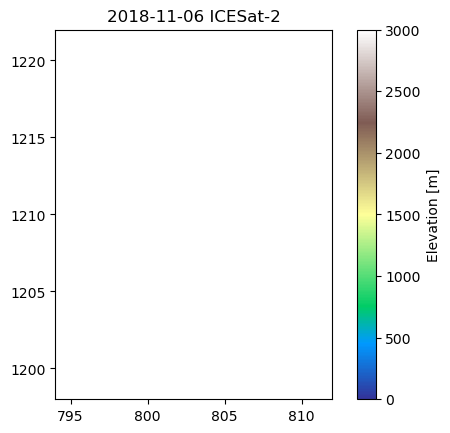

 
2019-01-07 00:00:00 ICESat-2
Surface elevations loaded from file.


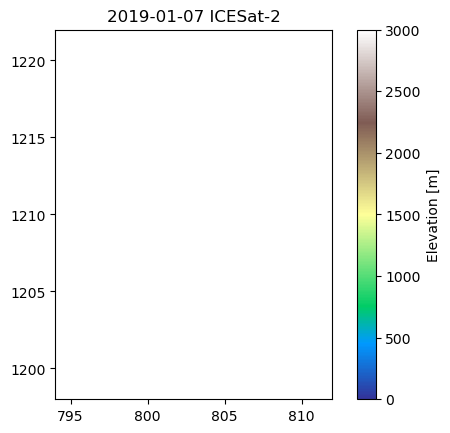

 
2019-01-09 00:00:00 ICESat-2
Surface elevations loaded from file.


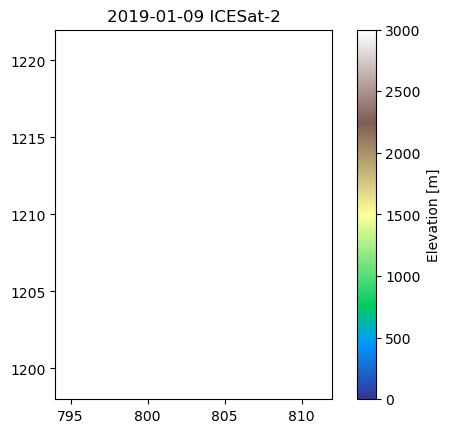

 
2019-02-07 00:00:00 ICESat-2
Surface elevations loaded from file.


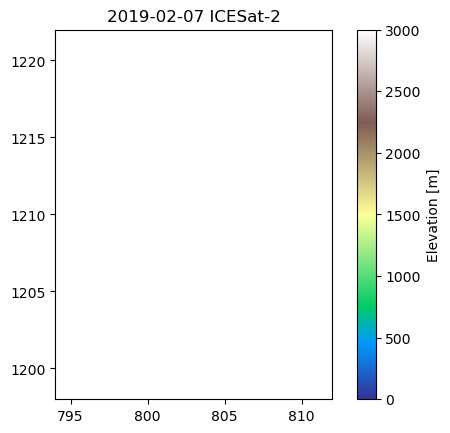

 
2019-02-09 00:00:00 ICESat-2
Surface elevations loaded from file.


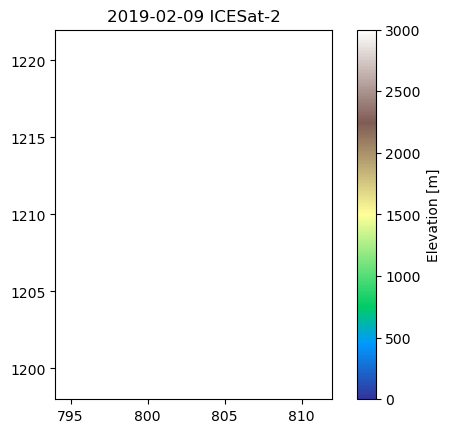

 
2019-04-10 00:00:00 ICESat-2
Surface elevations loaded from file.


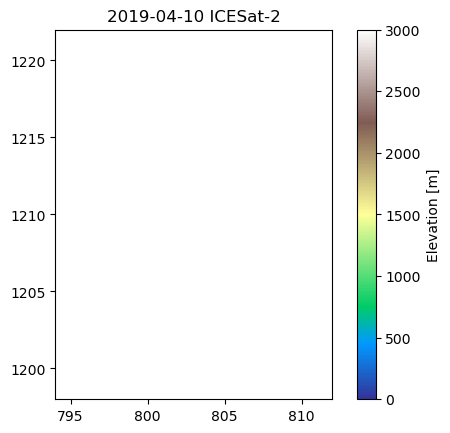

 
2019-06-09 00:00:00 ICESat-2
Surface elevations loaded from file.


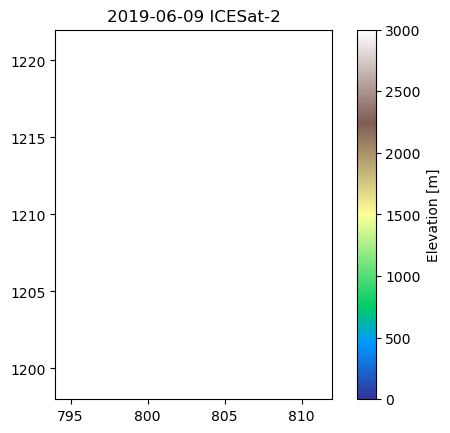

 
2019-08-07 00:00:00 ICESat-2
No data values over IFSAR, skipping...
2019-09-05 00:00:00 ICESat-2
Surface elevations loaded from file.


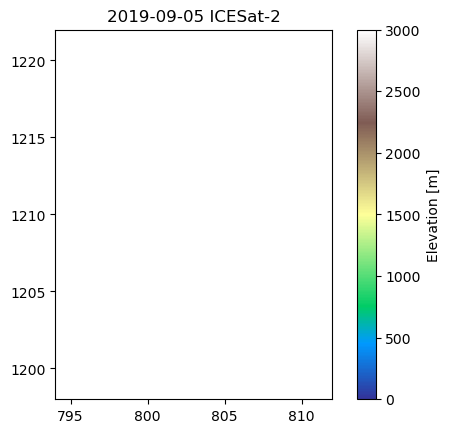

 
2019-09-08 00:00:00 ICESat-2
Surface elevations loaded from file.


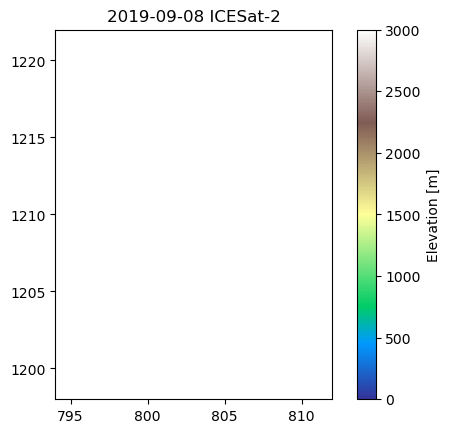

 
2019-09-09 00:00:00 ICESat-2
No data values over IFSAR, skipping...
2019-10-07 00:00:00 ICESat-2
Surface elevations loaded from file.


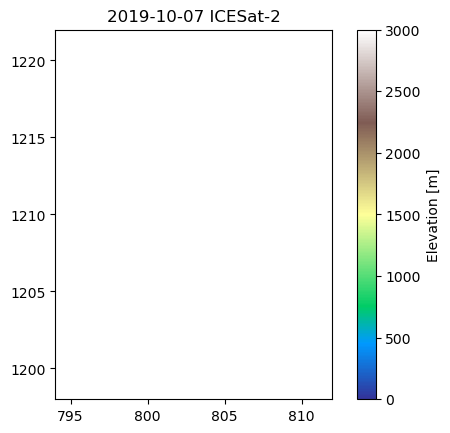

 
2019-10-08 00:00:00 ICESat-2
Surface elevations loaded from file.


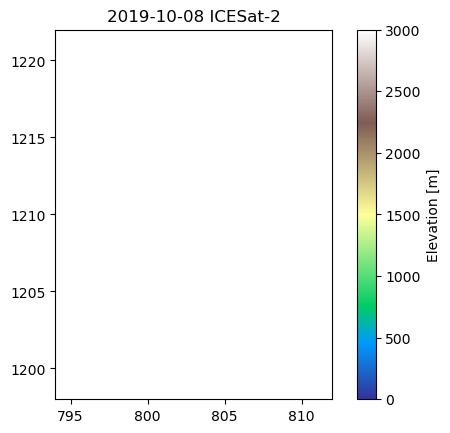

 
2019-11-05 00:00:00 ICESat-2
Surface elevations loaded from file.


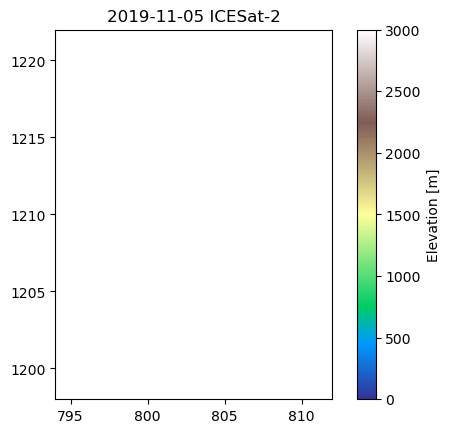

 
2020-01-06 00:00:00 ICESat-2
Surface elevations loaded from file.


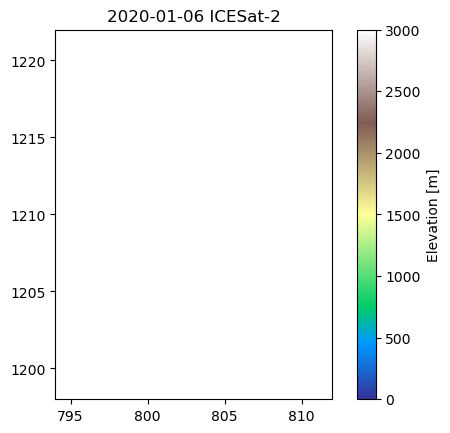

 
2020-01-07 00:00:00 ICESat-2
Surface elevations loaded from file.


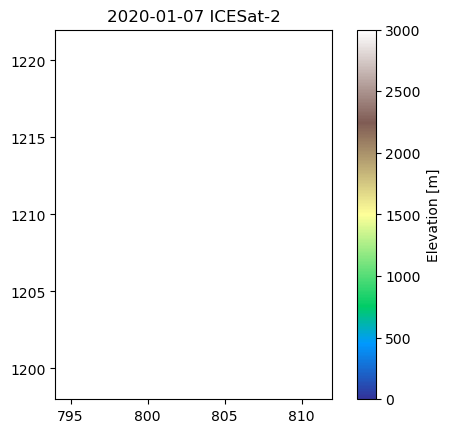

 
2020-02-04 00:00:00 ICESat-2
Surface elevations loaded from file.


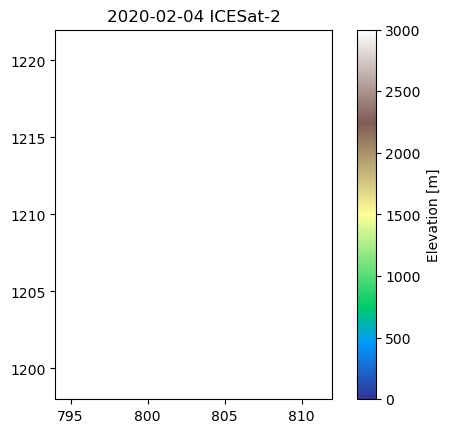

 
2020-02-08 00:00:00 ICESat-2
Surface elevations loaded from file.


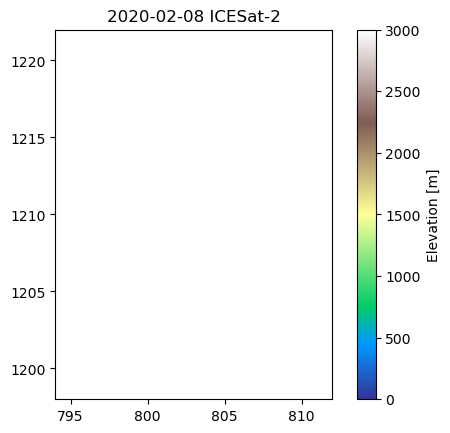

 
2020-03-05 00:00:00 ICESat-2
Surface elevations loaded from file.


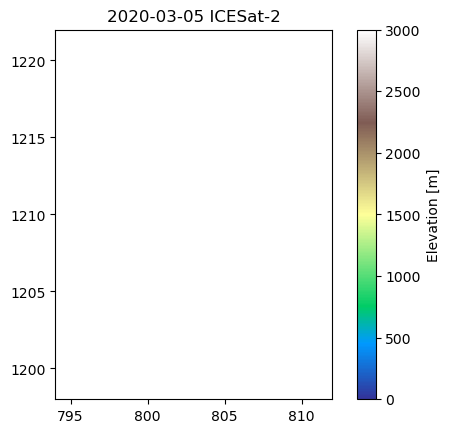

 
2020-04-07 00:00:00 ICESat-2
Surface elevations loaded from file.


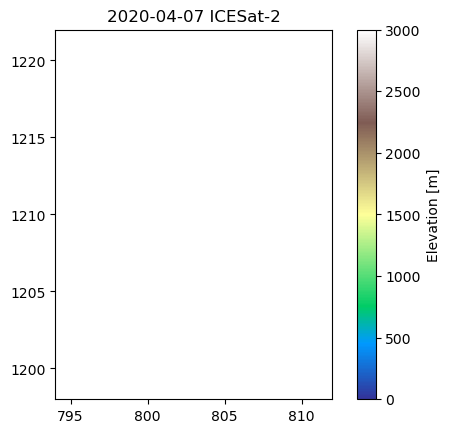

 
2020-05-06 00:00:00 ICESat-2
Surface elevations loaded from file.


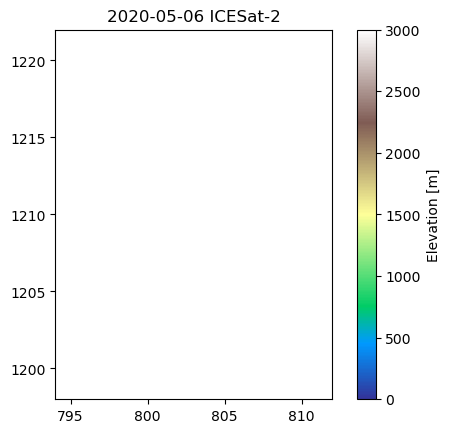

 
2020-07-07 00:00:00 ICESat-2
Surface elevations loaded from file.


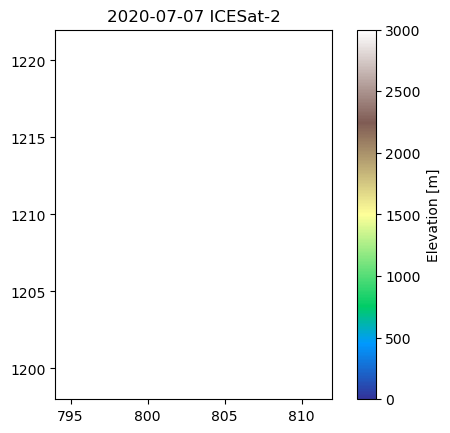

 
2020-08-05 00:00:00 ICESat-2
Surface elevations loaded from file.


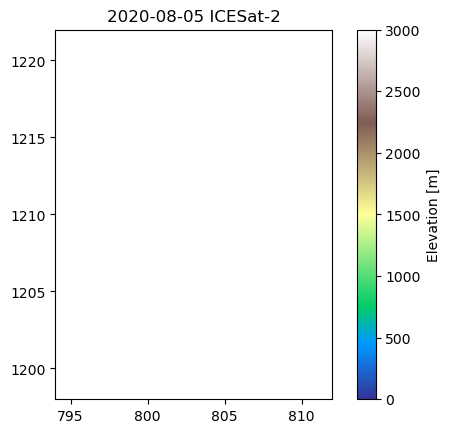

 
2020-09-05 00:00:00 ICESat-2
Surface elevations loaded from file.


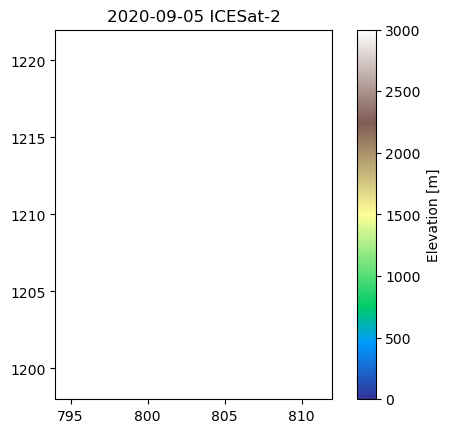

 
2020-10-04 00:00:00 ICESat-2
Surface elevations loaded from file.


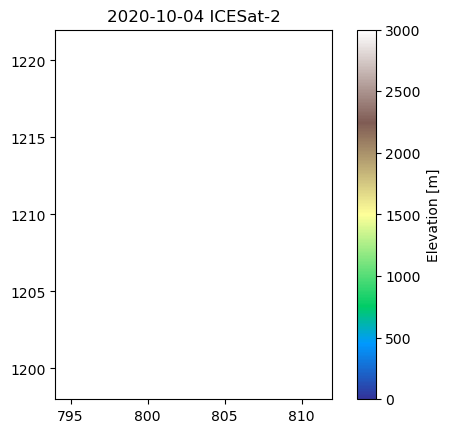

 
2020-10-06 00:00:00 ICESat-2
Surface elevations loaded from file.


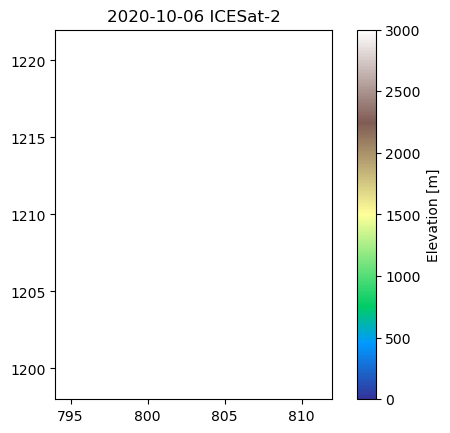

 
2020-11-02 00:00:00 ICESat-2
Surface elevations loaded from file.


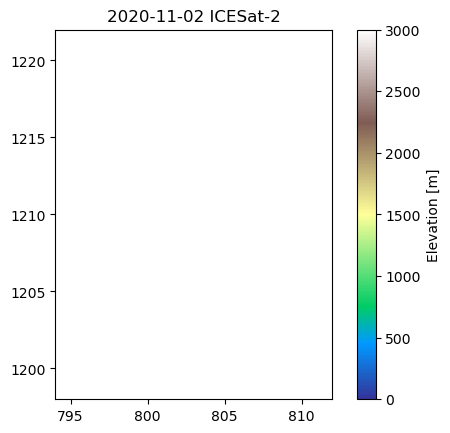

 
2020-12-05 00:00:00 ICESat-2
Surface elevations loaded from file.


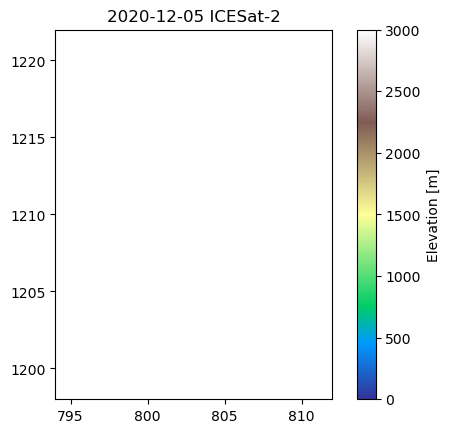

 
2021-01-03 00:00:00 ICESat-2
Surface elevations loaded from file.


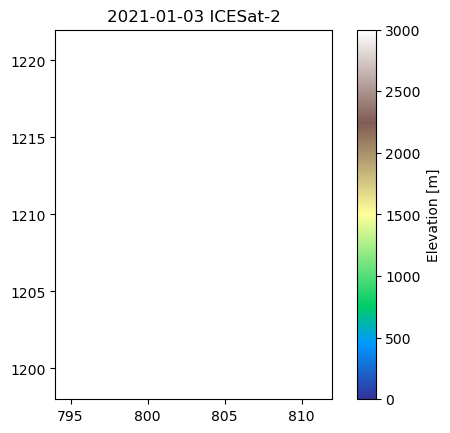

 
2021-03-03 00:00:00 ICESat-2
Surface elevations loaded from file.


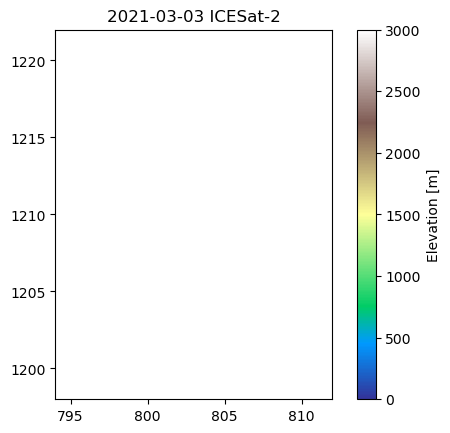

 
2021-03-06 00:00:00 ICESat-2
Surface elevations loaded from file.


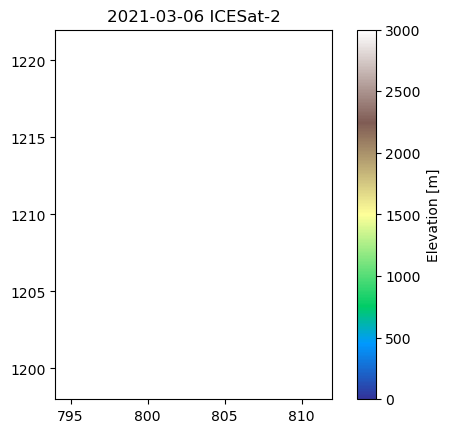

 
2021-04-04 00:00:00 ICESat-2
Surface elevations loaded from file.


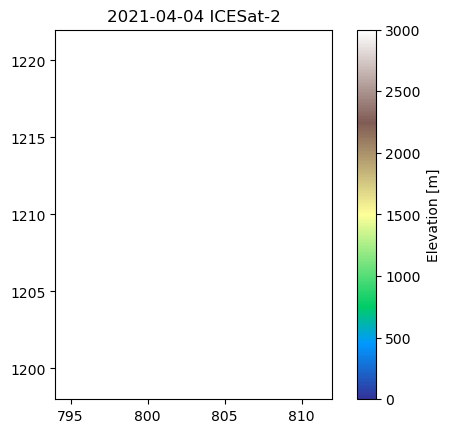

 
2021-06-05 00:00:00 ICESat-2
Surface elevations loaded from file.


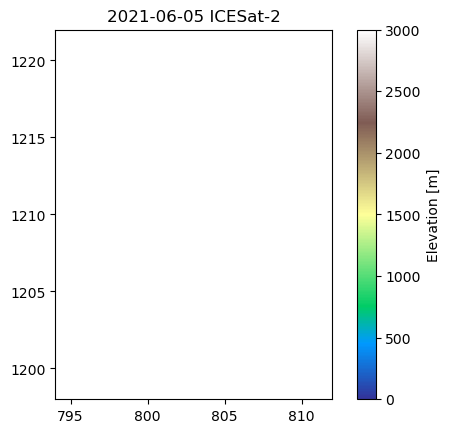

 
2021-07-05 00:00:00 ICESat-2
Surface elevations loaded from file.


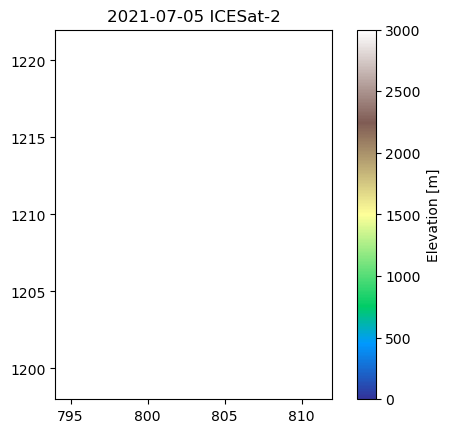

 
2021-09-05 00:00:00 ICESat-2
Surface elevations loaded from file.


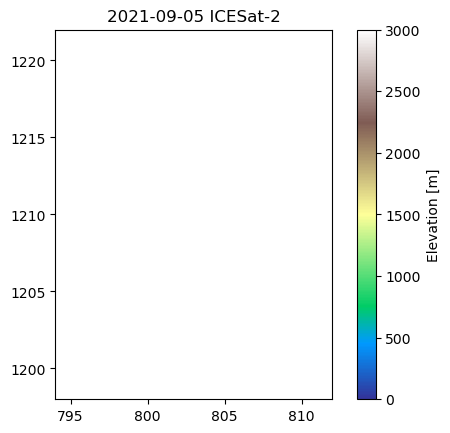

 
2021-10-04 00:00:00 ICESat-2
Surface elevations loaded from file.


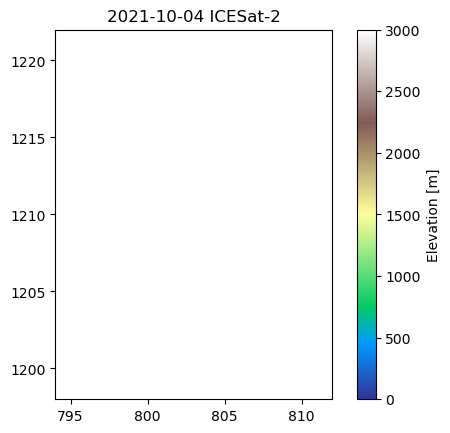

 
2021-11-04 00:00:00 ICESat-2
Surface elevations loaded from file.


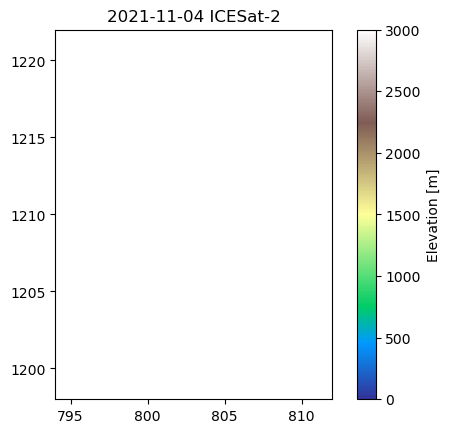

 
2021-12-05 00:00:00 ICESat-2
Surface elevations loaded from file.


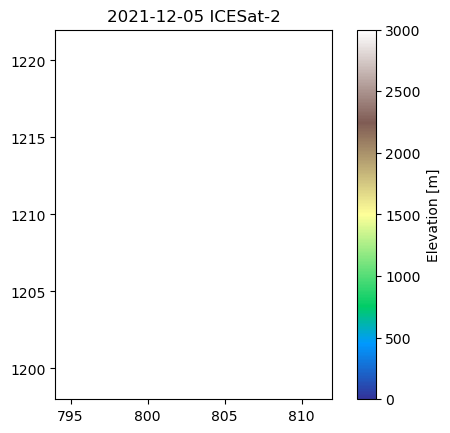

 
2022-01-03 00:00:00 ICESat-2
Surface elevations loaded from file.


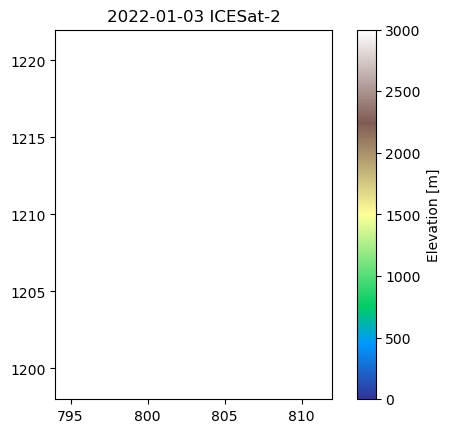

 
2022-01-30 00:00:00 ICESat-2
Surface elevations loaded from file.


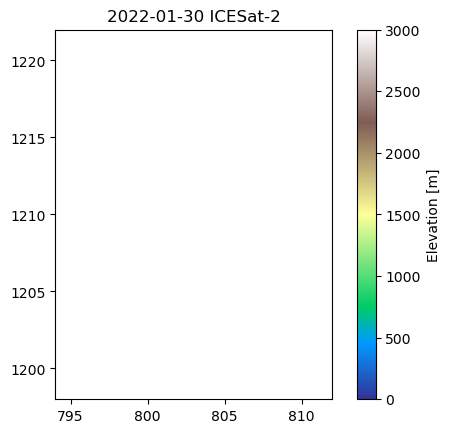

 
2022-02-01 00:00:00 ICESat-2
Surface elevations loaded from file.


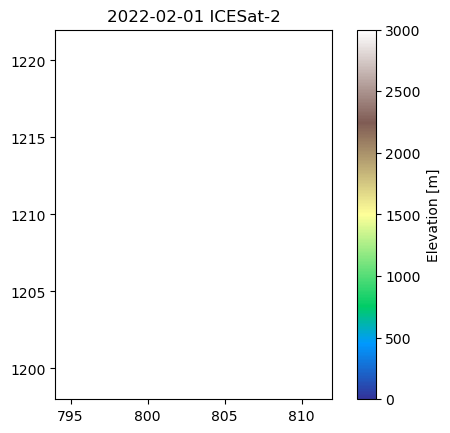

 
2022-03-04 00:00:00 ICESat-2
Surface elevations loaded from file.


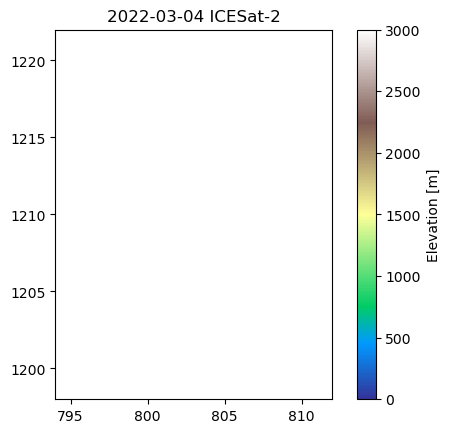

 
2022-06-03 00:00:00 ICESat-2
Surface elevations loaded from file.


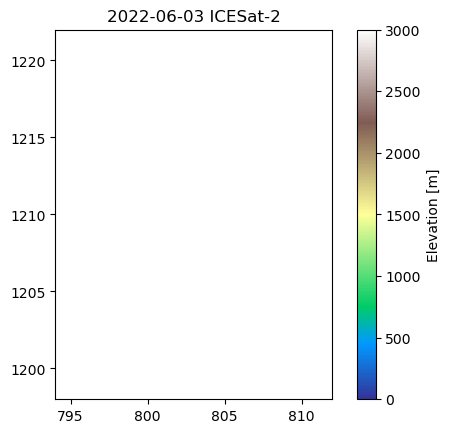

 
2022-07-02 00:00:00 ICESat-2
Surface elevations loaded from file.


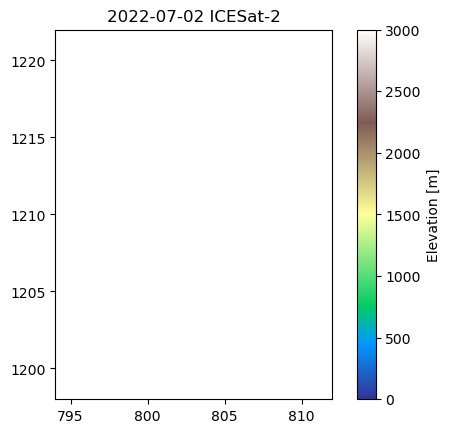

 
2022-07-03 00:00:00 ICESat-2
Surface elevations loaded from file.


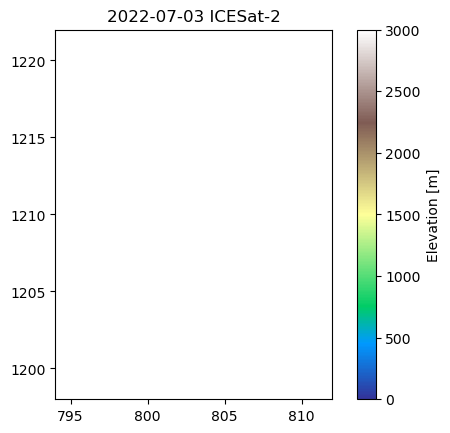

 
2022-10-30 00:00:00 ICESat-2
Surface elevations loaded from file.


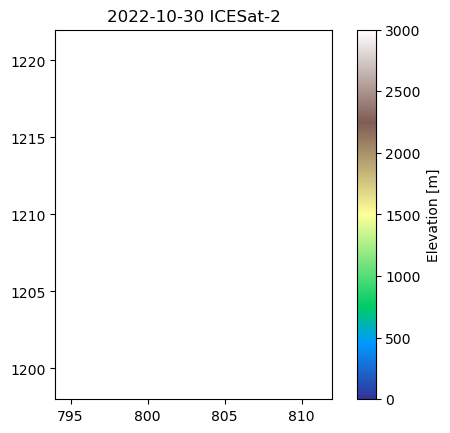

 
2022-10-31 00:00:00 ICESat-2
Surface elevations loaded from file.


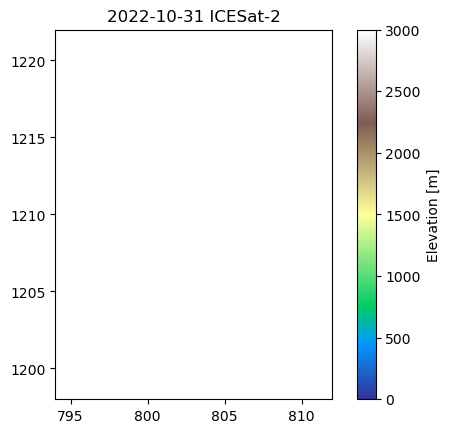

 
2022-11-29 00:00:00 ICESat-2
Surface elevations loaded from file.


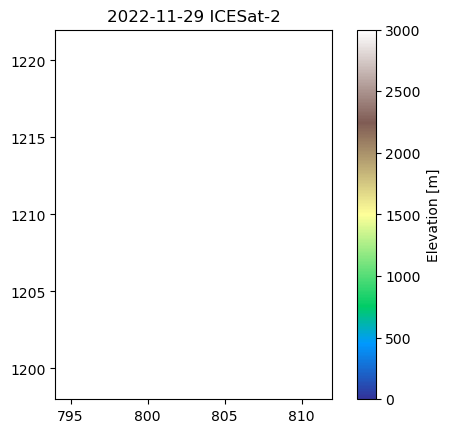

 
2022-12-02 00:00:00 ICESat-2
Surface elevations loaded from file.


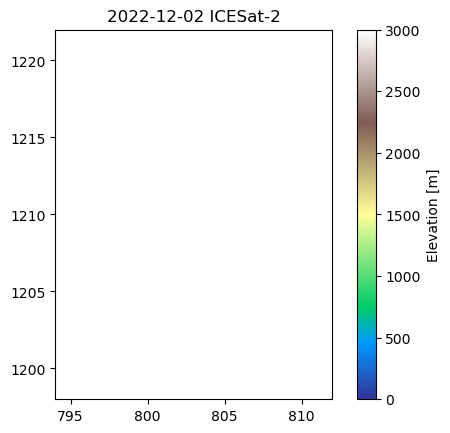

 
2022-12-03 00:00:00 ICESat-2
Surface elevations loaded from file.


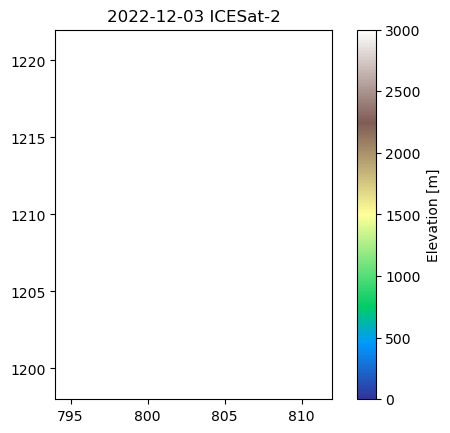

 
2023-01-30 00:00:00 ICESat-2
Surface elevations loaded from file.


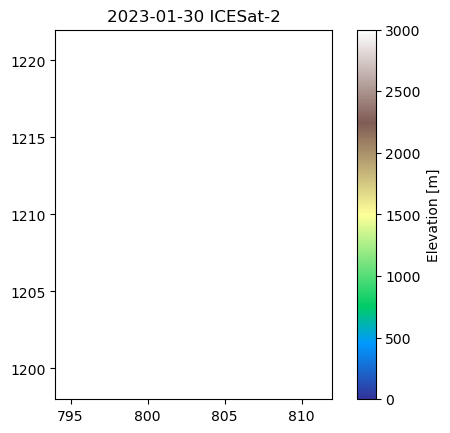

 
2023-03-02 00:00:00 ICESat-2
Surface elevations loaded from file.


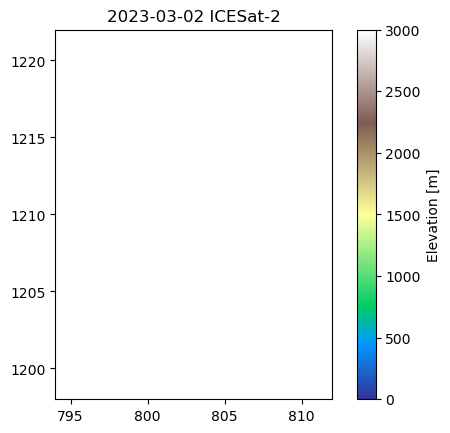

 
2023-03-04 00:00:00 ICESat-2
Surface elevations loaded from file.


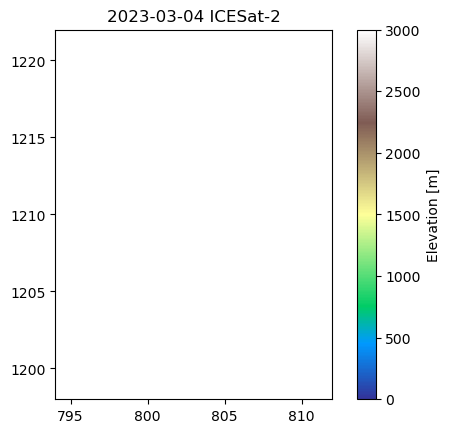

 
2023-04-02 00:00:00 ICESat-2
Surface elevations loaded from file.


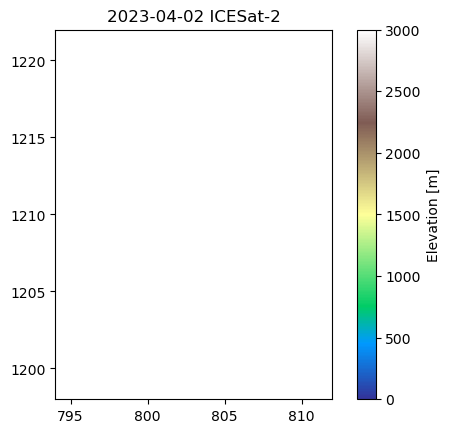

 
2023-05-01 00:00:00 ICESat-2
Surface elevations loaded from file.


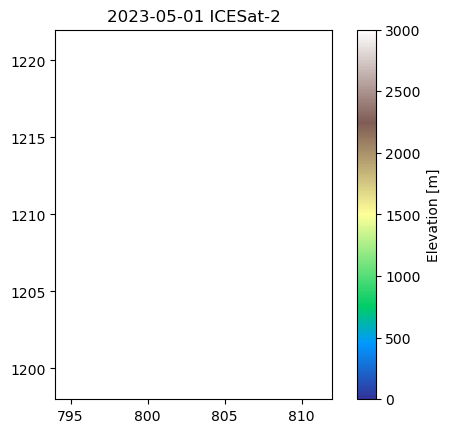

 
2023-06-01 00:00:00 ICESat-2
Surface elevations loaded from file.


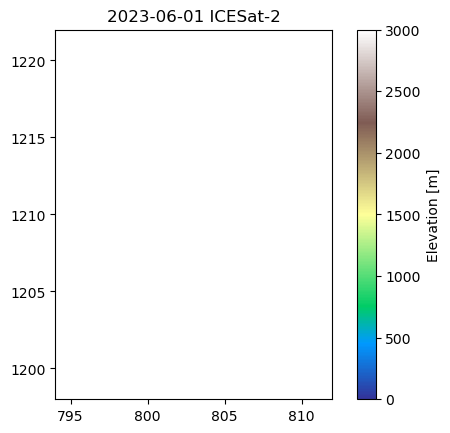

 
2023-06-03 00:00:00 ICESat-2
Surface elevations loaded from file.


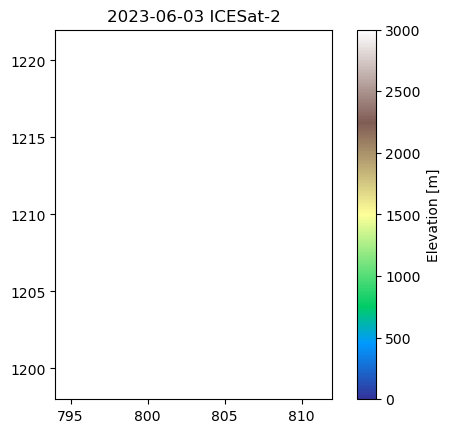

 
2023-06-30 00:00:00 ICESat-2
Surface elevations loaded from file.


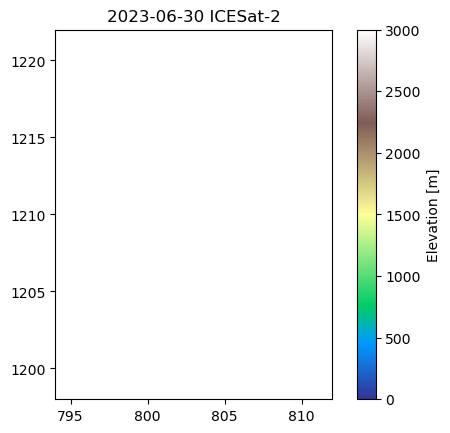

 
2023-07-02 00:00:00 ICESat-2
Surface elevations loaded from file.


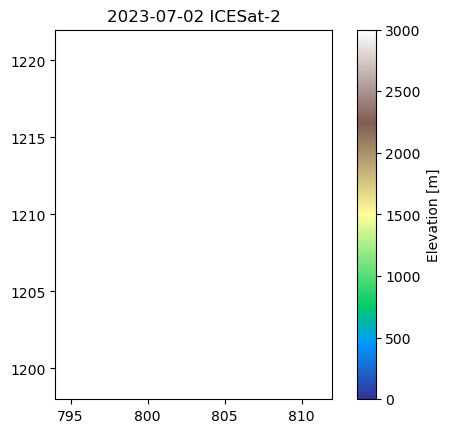

 
2023-07-29 00:00:00 ICESat-2
Surface elevations loaded from file.


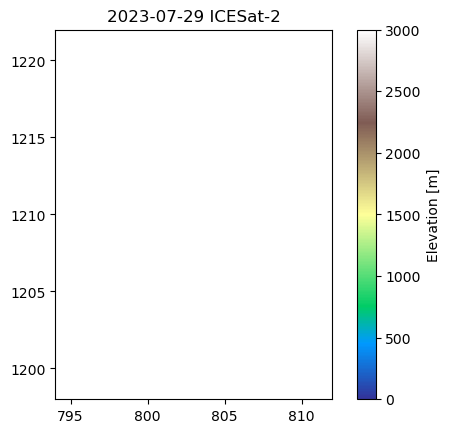

 
2023-07-31 00:00:00 ICESat-2
Surface elevations loaded from file.


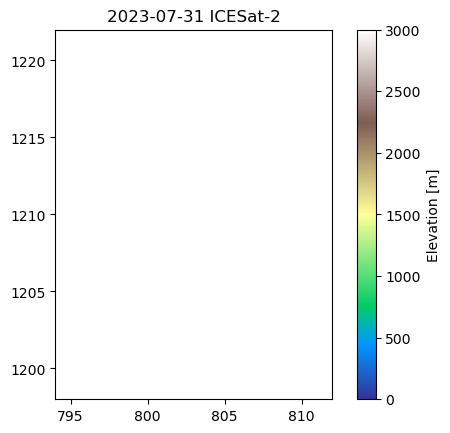

 
2023-08-02 00:00:00 ICESat-2
Surface elevations loaded from file.


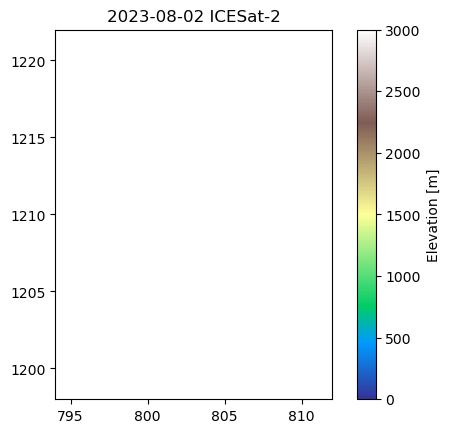

 
2023-08-31 00:00:00 ICESat-2
Surface elevations loaded from file.


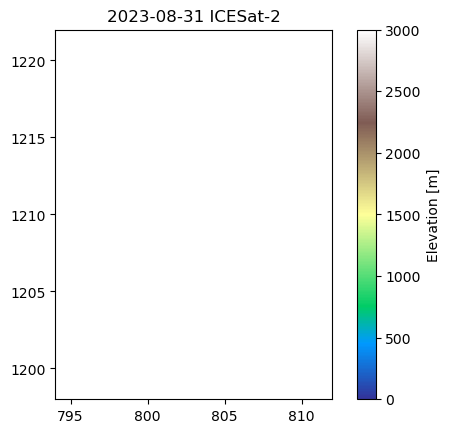

In [13]:
# -----Check if h_out_path exists
if not os.path.exists(h_out_path):
    os.mkdir(h_out_path)

# -----Define function for reprojecting and regridding to IFSAR DEM
def reproject_regrid(da, ref_da):
    da = da.rio.reproject(ref_da.rio.crs)
    da_interp = da.interp(x=ref_da.x.data, y=ref_da.y.data)
    return da_interp

# -----Define settings for plotting
xmin, xmax = 794, 812
ymin, ymax = 1198, 1222
clim=(0, 3e3)

# -----Iterate over surface elevation file names
for h_fn in tqdm(h_fns + is2_fns):
    # Grab date and dataset from file name
    if 'SETSM' in os.path.basename(h_fn):
        dataset = 'ArcticDEM'
        date = os.path.basename(h_fn).split('_')[3]
        dt = datetime.datetime(int(date[0:4]), int(date[4:6]), int(date[6:8]))
        date = date[0:4] + '-' + date[4:6] + '-' + date[6:8]
    elif 'ILAK' in h_fn:
        dataset = 'OIB'
        year = os.path.basename(h_fn).split('_')[1]
        julian_day = os.path.basename(h_fn).split('_')[2]
        dt = datetime.datetime.strptime(year+julian_day, '%Y%j')
        date = str(dt)
    elif 'ICESat-2' in h_fn:
        dataset = 'ICESat-2'
        date = os.path.basename(h_fn)[0:10]
        dt = datetime.datetime(int(date[0:4]), int(date[5:7]), int(date[8:10])) 
    elif ('Hubbard.' in h_fn) or ('Valerie.' in h_fn):
        dataset = 'OIB'
        year = os.path.basename(h_fn).split('.')[1]
        julian_day = os.path.basename(h_fn).split('.')[2][0:3]
        dt = datetime.datetime.strptime(year+julian_day, '%Y%j')
        date = str(dt)
    
    print(dt, dataset)

    # Define output file name
    h_out_fn = os.path.join(h_out_path, f'{date[0:10]}_{dataset}_Hubbard.tif')

    # Check if DEM already exists in file
    if os.path.exists(h_out_fn):
        h_xda = rxr.open_rasterio(h_out_fn)
        h_xda = h_xda.rio.write_crs('EPSG:3338')
        print('Surface elevations loaded from file.')
    # Check if DEM on the filter list
    elif [date[0:10], dataset] in filter_deets:
        print('DEM on the filter list, skipping...')
        continue
    
    else:
    
        # Load DEM
        h_xda = rxr.open_rasterio(h_fn)
        if dataset=='ICESat-2':
            h_xda = h_xda.rio.write_crs('EPSG:3338')
        
        # Reproject and interpolate to IFSAR coordinates
        h_xda = reproject_regrid(h_xda, ifsar)
        # Remove no data values
        h_xda = xr.where(h_xda==h_xda._FillValue, np.nan, h_xda) 
        # Assign dataset attribute
        h_xda = h_xda.assign_attrs({'dataset': dataset})
    
        # Check for data coverage
        if (np.isnan(h_xda.data[0])).all():
            print('No data values over IFSAR, skipping...')
            continue
    
        # Save as TIF file
        h_xda.rio.to_raster(h_out_fn)
        print('Raster saved to file:', h_out_fn)

    # Plot
    fig, ax = plt.subplots()
    h_im = ax.imshow(h_xda.data[0], cmap='terrain', clim=clim,
                     extent=(np.min(h_xda.x.data)/1e3, np.max(h_xda.x.data)/1e3, 
                             np.min(h_xda.y.data)/1e3, np.max(h_xda.y.data)/1e3))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_title(f'{date[0:10]} {dataset}')
    fig.colorbar(h_im, ax=ax, label='Elevation [m]')
    plt.show()

    print(' ')
    
        

## Plot elevation anomalies from median over time

In [14]:
# # Grab filtered surface elevation file names
# h_out_fns = sorted(glob.glob(os.path.join(h_out_path, '*.tif')))
# print('Loading and concatenating DEMs...')
# i=0
# for h_out_fn in tqdm(h_out_fns):
#     # Grab date from file name
#     date = os.path.basename(h_out_fn).split('_')[0]
#     # Load DEM
#     h_xda = rxr.open_rasterio(h_out_fn)
#     # Convert to xarray.Dataset
#     h_xda = h_xda.expand_dims(time=[np.datetime64(date)])
#     h_xds_date = h_xda.to_dataset(dim='band')
#     h_xds_date = h_xds_date.rename({1:'surface_elevation'})
#     # Concatenate to full dataset
#     if i==0:
#         h_xds = h_xds_date.copy()
#     else:
#         h_xds = xr.concat([h_xds, h_xds_date], dim='time')
#     i+=1

# # Subtract the spatial median
# h_diff_xds = h_xds - h_xds.median(dim='time')

In [15]:
# # Plot over time
# for i in range(len(h_diff_xds.time.data)):
#     h_diff_date_xds = h_diff_xds.isel(time=i)
#     date = h_diff_xds.time.data[i]
#     fig, ax = plt.subplots()
#     h_diff_im = ax.imshow(h_diff_date_xds['surface_elevation'].data, cmap=plt.cm.RdBu, clim=(-20, 20),
#                           extent=(np.min(h_diff_date_xds.x.data)/1e3, np.max(h_diff_date_xds.x.data)/1e3,
#                                   np.min(h_diff_date_xds.y.data)/1e3, np.max(h_diff_date_xds.y.data)/1e3))
#     ax.set_xlabel('Easting [km]')
#     ax.set_ylabel('Northing [km]')
#     ax.set_title(str(date)[0:10])
#     fig.colorbar(h_diff_im, ax=ax, label='Elevation anomaly [m]')
#     plt.show()

## Calculate surface elevation anomalies over time with respect to IFSAR

In [16]:
# Grab filtered surface elevation file names
h_out_fns = sorted(glob.glob(os.path.join(h_out_path, '*.tif')))
# Iterate over file names
i=0
for h_out_fn in tqdm(h_out_fns):
    # Grab date from file name
    date = os.path.basename(h_out_fn).split('_')[0]
    # Load DEM
    h_xda = rxr.open_rasterio(h_out_fn)
    # Subtract IFSAR elevations
    h_xda = h_xda - ifsar['h'].data
    # Convert to xarray.Dataset
    h_xda = h_xda.expand_dims(time=[np.datetime64(date)])
    h_diff_date = h_xda.to_dataset(dim='band')
    h_diff_date = h_diff_date.rename({1:'surface_elevation_diff_from_IFSAR'})
    # Add dataset dimension
    if 'ArcticDEM' in os.path.basename(h_out_fn):
        dataset = 'ArcticDEM'
    elif 'OIB' in os.path.basename(h_out_fn):
        dataset = 'OIB'
    elif 'ICESat-2' in os.path.basename(h_out_fn):
        dataset = 'ICESat-2'
    h_diff_date = h_diff_date.assign_coords(dataset=dataset)
    # Concatenate to full dataset
    if i==0:
        h_diff = h_diff_date.copy()
    else:
        h_diff = xr.concat([h_diff, h_diff_date], dim='time')
    i+=1
h_diff = h_diff.rio.write_crs('EPSG:4326')
h_diff

  0%|          | 0/130 [00:00<?, ?it/s]

<xarray.Dataset>
Dimensions:                            (time: 130, y: 1701, x: 1690)
Coordinates:
  * time                               (time) datetime64[s] 2009-02-22 ... 20...
  * x                                  (x) float64 7.798e+05 ... 8.136e+05
  * y                                  (y) float64 1.231e+06 ... 1.197e+06
    dataset                            (time) <U9 'ArcticDEM' ... 'ICESat-2'
    spatial_ref                        int64 0
Data variables:
    surface_elevation_diff_from_IFSAR  (time, y, x) float64 nan nan ... nan nan

## Extract surface elevation anomalies in polygons

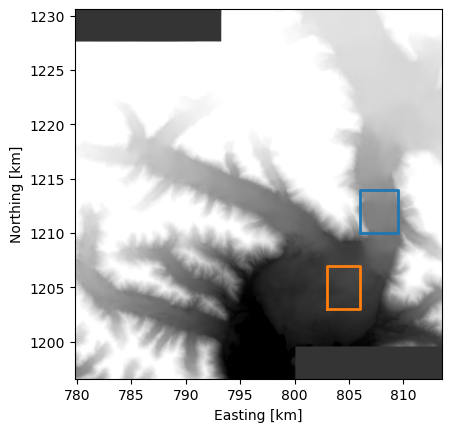

In [29]:
# Select gates to grab anomalies
from shapely.geometry import Polygon, LineString
xmin1, xmax1 = 806e3, 809.5e3
ymin1, ymax1 = 1.210e6, 1.214e6
poly1 = Polygon([[xmin1, ymin1], [xmax1, ymin1],
                 [xmax1, ymax1], [xmin1, ymax1], [xmin1, ymin1]])
xmin2, xmax2 = 803e3, 806e3
ymin2, ymax2 = 1.203e6, 1.207e6
poly2 = Polygon([[xmin2, ymin2], [xmax2, ymin2],
                 [xmax2, ymax2], [xmin2, ymax2], [xmin2, ymin2]])

# plot
fig, ax = plt.subplots()
ax.imshow(ifsar['h'], cmap='Greys_r', clim=(0,1500),
          extent=(np.min(ifsar.x.data)/1e3, np.max(ifsar.x.data)/1e3,
                  np.min(ifsar.y.data)/1e3, np.max(ifsar.y.data)/1e3))
ax.plot(np.divide(poly1.exterior.coords.xy[0], 1e3), 
        np.divide(poly1.exterior.coords.xy[1], 1e3), 
        '-', linewidth=2)
ax.plot(np.divide(poly2.exterior.coords.xy[0], 1e3), 
        np.divide(poly2.exterior.coords.xy[1], 1e3),
        '-', linewidth=2)
ax.set_xlabel('Easting [km]')
ax.set_ylabel('Northing [km]')
plt.show()

In [51]:
# Interpolate thickness anomalies in polygons
h_diff_poly1 = h_diff.rio.clip([poly1]).surface_elevation_diff_from_IFSAR.median(dim=['x', 'y'], skipna=True).data
h_diff_poly2 = h_diff.rio.clip([poly2]).surface_elevation_diff_from_IFSAR.median(dim=['x', 'y'], skipna=True).data
datasets = h_diff.dataset.data

# Compile in dataframe
diffs_df = pd.DataFrame({'Date': h_diff.time.data,
                         'Dataset': datasets,
                         'median_diff_upglacier': h_diff_poly1,
                         'median_diff_downglacier': h_diff_poly2})
for col in ['median_diff_upglacier', 'median_diff_downglacier']:
    diffs_df.loc[np.abs(diffs_df[col]) > 30, col] = np.nan
diffs_df.set_index('Date', inplace=True)

# Add date columns
diffs_df['year'] = pd.DatetimeIndex(diffs_df.index).year
diffs_df['month'] = pd.DatetimeIndex(diffs_df.index).month
diffs_df['WOY'] = pd.DatetimeIndex(diffs_df.index).isocalendar().week
diffs_df['DOY'] = pd.DatetimeIndex(diffs_df.index).dayofyear

diffs_df

Dataset  median_diff_upglacier  median_diff_downglacier  year  \
Date                                                                          
2009-02-22  ArcticDEM                    NaN                15.382660  2009   
2010-08-26  ArcticDEM                    NaN                      NaN  2010   
2011-09-25  ArcticDEM              16.070343                      NaN  2011   
2011-10-04  ArcticDEM                    NaN                29.262512  2011   
2012-03-21        OIB              14.207230                17.249992  2012   
...               ...                    ...                      ...   ...   
2023-07-02   ICESat-2                    NaN                      NaN  2023   
2023-07-29   ICESat-2                    NaN                      NaN  2023   
2023-07-31   ICESat-2                    NaN                      NaN  2023   
2023-08-02   ICESat-2                    NaN                      NaN  2023   
2023-08-31   ICESat-2                    NaN                      NaN  2023   

            month  WOY  DOY  
Date                         
2009-02-22      2    8   53  
2010-08-26      8   34  238  
2011-09-25      9   38  268  
2011-10-04     10   40  277  
2012-03-21      3   12   81  
...           ...  ...  ...  
2023-07-02      7   26  183  
2023-07-29      7   30  210  
2023-07-31      7   31  212  
2023-08-02      8   31  214  
2023-08-31      8   35  243  

[130 rows x 7 columns]

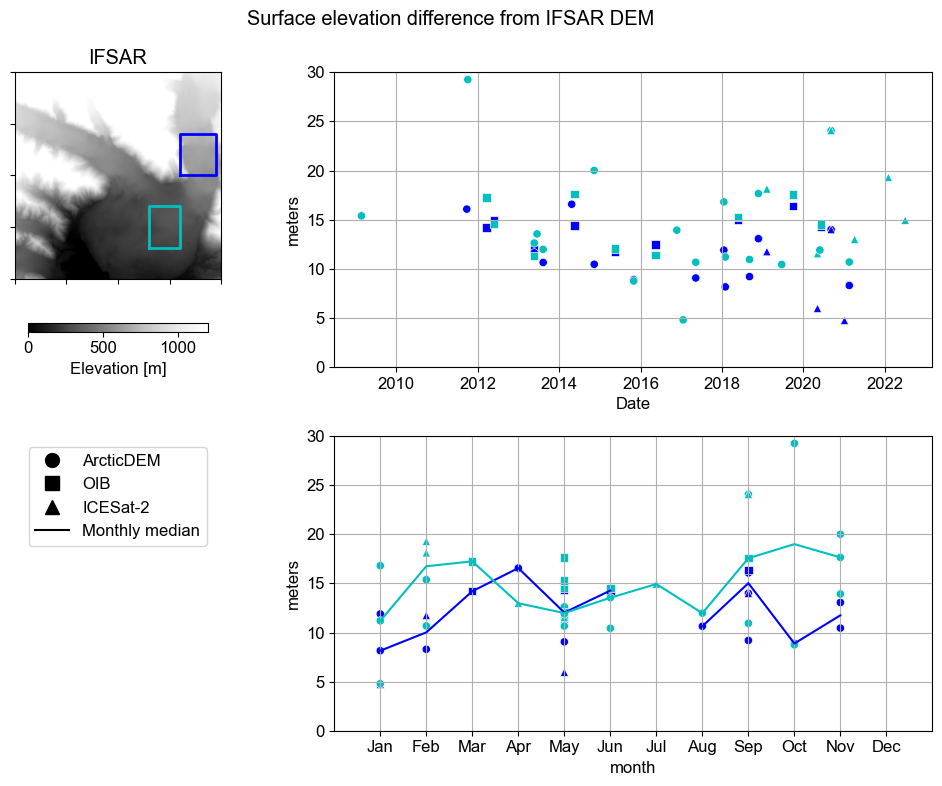

Figure saved to file: /Users/raineyaberle/Research/PhD/Hubbard/figures/surface_elevation_anomaly_regions_datasets.png


In [101]:
# -----Plot
# define colors
poly1_col = 'b'
poly2_col = 'c'
# figure settings
lw = 1.5 # line width
ms = 10 # marker size
marker_dict = {'ArcticDEM': 'o',
               'OIB': 's',
               'ICESat-2': '^'}

plt.rcParams.update({'font.sans-serif': 'Arial', 'font.size': 12})
fig, ax = plt.subplots(2, 2, figsize=(10,8), gridspec_kw={'width_ratios': [1, 2]})
ax = ax.flatten()
# IFSAR map
ifsar_im = ax[0].imshow(ifsar['h'], cmap='Greys_r', clim=(0,1200), 
             extent=(np.min(ifsar.x.data)/1e3, np.max(ifsar.x.data)/1e3,
                     np.min(ifsar.y.data)/1e3, np.max(ifsar.y.data)/1e3))
ax[0].plot(np.divide(poly1.exterior.coords.xy[0], 1e3), np.divide(poly1.exterior.coords.xy[1], 1e3),
           '-', color=poly1_col, linewidth=2)
ax[0].plot(np.divide(poly2.exterior.coords.xy[0], 1e3), np.divide(poly2.exterior.coords.xy[1], 1e3),
           '-', color=poly2_col, linewidth=2)
ax[0].set_xticklabels([])
ax[0].set_yticklabels([])
fig.colorbar(ifsar_im, ax=ax[0], shrink=0.6, label='Elevation [m]', orientation='horizontal')
ax[0].set_title('IFSAR')
ax[0].set_xlim(790, 810)
ax[0].set_ylim(1200, 1220)
for column, color in zip(['median_diff_upglacier', 'median_diff_downglacier'], [poly1_col, poly2_col]):
    # Full time series
    sns.scatterplot(data=diffs_df, x='Date', y=column, color=color, style='Dataset', 
                    markers=marker_dict, ax=ax[1], legend=False)
    # Monthly 
    sns.scatterplot(data=diffs_df, x='month', y=column, style='Dataset', 
                    markers=marker_dict, color=color, legend=False)
    ax[3].plot(diffs_df.groupby(by='month')[column].median().index,
               diffs_df.groupby(by='month')[column].median(), 
               '-', color=color, linewidth=lw)


ax[1].set_ylabel('meters')
ax[1].grid()
ax[1].set_ylim(0, 30)
ax[3].set_ylabel('meters')
ax[3].set_ylim(0, 30)
ax[3].grid()
# plot dummy points for legend
for dataset, marker in zip(marker_dict.keys(), marker_dict.values()):
    ax[3].plot(-10, -10, marker, markersize=ms, color='k', label=dataset)
ax[3].plot(-10, -10, '-k', linewidth=lw, label='Monthly median')
handles, labels = ax[3].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower left', bbox_to_anchor=[0.07, 0.3, 0.3, 0.3])
ax[3].set_xlim(0, 13)
ax[3].set_xticks(np.arange(1,13))
ax[3].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax[2].remove()
    
fig.suptitle('Surface elevation difference from IFSAR DEM')
fig.tight_layout()
plt.show()

# save figure
fig_fn = os.path.join(figures_out_path, 'surface_elevation_anomaly_regions_datasets.png')
fig.savefig(fig_fn, dpi=250, bbox_inches='tight')
print('Figure saved to file:', fig_fn)

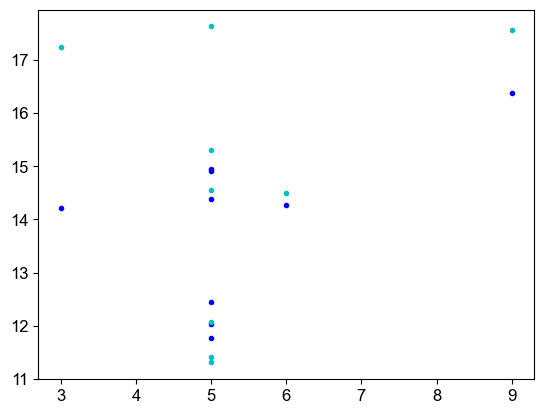

In [97]:
plt.plot(diffs_df.loc[diffs_df['Dataset']=='OIB', 'month'],
         diffs_df.loc[diffs_df['Dataset']=='OIB', 'median_diff_upglacier'],
         '.', color=poly1_col)
plt.plot(diffs_df.loc[diffs_df['Dataset']=='OIB', 'month'],
         diffs_df.loc[diffs_df['Dataset']=='OIB', 'median_diff_downglacier'],
         '.', color=poly2_col)
plt.show()